<a href="https://colab.research.google.com/github/waleligntewabe/Application-of-Sentence-Parsing/blob/main/Application_of_Sentence_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# **Part One**

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_lg

2023-12-10 07:28:17.209033: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 07:28:17.209118: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 07:28:17.209168: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 07:28:17.220215: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 07:28:18.837216: W tensorflow/compiler/

In [ ]:
#Upload the dataset from local storage into colab
from google.colab import files
files.upload()
#reading the dataset

Saving model_MLP.h5 to model_MLP.h5
Saving model_MLP.json to model_MLP.json
Saving model5.gensim to model5.gensim
Saving verb_pre_1.txt to verb_pre_1.txt


{'model_MLP.h5': b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x08\x7f$\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x05\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00P\x01\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x000\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
import nltk
nltk.download('wordnet_ic')

[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.


True

# **Part Two**

In [ ]:
# https://engdic.org/lists-of-adverbs/
trainset = [
    ('Somewhat','D'),
    ('Enormously','D'),
    ('Totally','D'),
    ('Utterly','D'),
    ('Perfectly','D'),
    ('Absolutely','D'),
    ('Practically','D'),
    ('Barely','D'),
    ('Terribly','D'),
    ('Pretty','D'),
    ('Thoroughly','D'),
    ('Rather','D'),
    ('Extremely','D'),
    ('Incredibly','D'),
    ('Most','D'),
    ('Purely','D'),
    ('Simply','D'),
    ('Least','D'),
    ('Little','D'),
    ('Intensely','D'),
    ('Much','D'),
    ('Virtually','D'),
    ('Very','D'),
    ('Fully','D'),
    ('Decidedly','D'),
    ('Indeed','D'),
    ('Hardly','D'),
    ('Almost','D'),
    ('Strongly','D'),
    ('So','D'),
    ('Less','D'),
    ('Fairly','D'),
    ('Greatly','D'),
    ('Just','D'),
    ('Entirely','D'),
    ('Highly','D'),
    ('Lots','D'),
    ('Really','D'),
    ('Quite','D'),
    ('Too','D'),
    ('Completely','D'),
    ('Well','D'),
    ('Far','D'),
    ('Deeply','D'),
    ('Badly','D'),
    ('Scarcely','D'),
    ('Nearly','D'),
    ('Positively','D'),
    ('How','D'),
    ('Enough','D'),
    ('Awfully','D'),
    ('Promptly','M'),
    ('Powerfully','M'),
    ('Calmly','M'),
    ('Politely','M'),
    ('Equally','M'),
    ('Faithfully','M'),
    ('Frankly','M'),
    ('Gently','M'),
    ('Generously','M'),
    ('Gladly','M'),
    ('Honestly','M'),
    ('Joyously','M'),
    ('Justly','M'),
    ('Obediently','M'),
    ('Patiently','M'),
    ('Openly','M'),
    ('Perfectly','M'),
    ('Quickly','M'),
    ('Quietly','M'),
    ('Easily','M'),
    ('Elegantly','M'),
    ('Rapidly','M'),
    ('Well','M'),
    ('Beautifully','M'),
    ('Cheerfully','M'),
    ('Cautiously','M'),
    ('Boldly','M'),
    ('Carefully','M'),
    ('Neatly','M'),
    ('Eagerly','M'),
    ('Kindly','M'),
    ('Bravely','M'),
    ('Poorly','M'),
    ('Stupidly','M'),
    ('Shyly','M'),
    ('Frantically','M'),
    ('Greedily','M'),
    ('Foolishly','M'),
    ('Selfishly','M'),
    ('Angrily','M'),
    ('Anxiously','M'),
    ('Tensely','M'),
    ('Awkwardly','M'),
    ('Violently','M'),
    ('Suspiciously','M'),
    ('Roughly','M'),
    ('Painfully','M'),
    ('Noisily','M'),
    ('Hungrily','M'),
    ('Inadequately','M'),
    ('Irritably','M'),
    ('Badly','M'),
    ('Lazily','M'),
    ('Loudly','M'),
    ('Madly','M'),
    ('Nervously','M'),
    ('Hastily','M'),
    ('Recklessly','M'),
    ('Rudely','M'),
    ('Blindly','M'),
    ('Carelessly','M'),
    ('Cruelly','M'),
    ('Sadly','M'),
    ('Behind','P'),
    ('About','P'),
    ('Upstairs','P'),
    ('Up','P'),
    ('Far','P'),
    ('Out','P'),
    ('East','P'),
    ('Right','P'),
    ('Inside','P'),
    ('On','P'),
    ('Away','P'),
    ('There','P'),
    ('Downstairs','P'),
    ('Backwards','P'),
    ('Nearby','P'),
    ('Over','P'),
    ('Along','P'),
    ('Above','P'),
    ('Abroad','P'),
    ('Below','P'),
    ('Down','P'),
    ('Under','P'),
    ('Here','P'),
    ('Towards','P'),
    ('Somewhere','P'),
    ('Near','P'),
    ('Back','P'),
    ('Indoors','P'),
    ('Overseas','P'),
    ('In','P'),
    ('Elsewhere','P'),
    ('Off','P'),
    ('Anywhere','P'),
    ('Underground','P'),
    ('Outside','P'),
    ('Today','T'),
    ('Tonight','T'),
    ('Occasionally','T'),
    ('Constantly','T'),
    ('Rarely','T'),
    ('Then','T'),
    ('Yesterday','T'),
    ('Later','T'),
    ('Infrequently','T'),
    ('Hourly','T'),
    ('Generally','T'),
    ('Before','T'),
    ('Weekly','T'),
    ('Yearly','T'),
    ('Next','T'),
    ('Normally','T'),
    ('until','T'),
    ('Still','T'),
    ('Soon','T'),
    ('Already','T'),
    ('Annually','T'),
    ('Always','T'),
    ('Yet','T'),
    ('Eventually','T'),
    ('Early','T'),
    ('Earlier','T'),
    ('Last','T'),
    ('Quarterly','T'),
    ('Daily','T'),
    ('Immediately','T'),
    ('First','T'),
    ('Fortnightly','T'),
    ('Formerly','T'),
    ('Just','T'),
    ('Usually','T'),
    ('Often','T'),
    ('Regularly','T'),
    ('Frequently','T'),
    ('Never','T'),
    ('Recently','T'),
    ('Late','T'),
    ('Monthly','T'),
    ('Previously','T'),
    ('Seldom','T'),
    ('Ever','T'),
    ('Now','T'),
    ('Lately','T'),
    ('Sometimes','T'),
    ('Since','T'),
    ('Finally','T'),
    ('Tomorrow','T'),
    ('Exactly','F'),
    ('Intermittently','F'),
    ('Quarterly','F'),
    ('Weekly','F'),
    ('Solemnly','F'),
    ('Eventually','F'),
    ('Suddenly','F'),
    ('Mysteriously','F'),
    ('Continually','F'),
    ('So','F'),
    ('Rightfully','F'),
    ('Regularly','F'),
    ('Daringly','F'),
    ('Sharply','F'),
    ('Normally','F'),
    ('Repeatedly','F'),
    ('Fiercely','F'),
    ('ever','F'),
    ('Sometimes','F'),
    ('Constantly','F'),
    ('Rarely','F'),
    ('Swiftly','F'),
    ('Hard','F'),
    ('Periodically','F'),
    ('never','F'),
    ('Later','F'),
    ('Speedily','F'),
    ('Inquisitively','F'),
    ('Infrequently','F'),
    ('Unexpectedly','F'),
    ('Fast','F'),
    ('Then','F'),
    ('Regularly','F'),
    ('Usually','F'),
    ('Hurriedly','F'),
    ('Really','F'),
    ('Slowly','F'),
    ('Always','F'),
    ('Reluctantly','F'),
    ('Seriously','F'),
    ('Accidentally','F'),
    ('Tightly','F'),
    ('Seldom','F'),
    ('Sleepily','F'),
    ('Occasionally','F'),
    ('Busily','F'),
    ('Rarely','F'),
    ('Loosely','F'),
    ('Deliberately','F'),
    ('Never','F'),
    ('Often','F'),
    ('Generally','F'),
    ('Frequently','F'),
    ('Otherwise','C'),
    ('Similarly','C'),
    ('Otherwise','C'),
    ('Rather','C'),
    ('Therefore','C'),
    ('Moreover','C'),
    ('Indeed','C'),
    ('Additionally','C'),
    ('Anyway','C'),
    ('Consequently','C'),
    ('Furthermore','C'),
    ('Nevertheless','C'),
    ('Besides','C'),
    ('Unlike','C'),
    ('Nonetheless','C')
]

wbsdefs = [
('somewhat', 'something '),
('enormously', 'to a very great or enormous degree or extent : exceedingly, vastly '),
('totally', 'in a total manner : to a total or complete degree : wholly, entirely '),
('utterly', 'to an absolute or extreme degree : to the full extent : in an utter manner : absolutely, entirely, totally '),
('perfectly', 'in a perfect manner; to a complete or adequate extent : quite '),
('absolutely', 'in an absolute manner: such as; completely or totally often used as an intensive; with unlimited power '),
('practically', 'in a practical manner; almost, nearly '),
('barely', 'in a meager manner : plainly; scarcely, hardly '),
('terribly', 'to an extreme degree : very : extremely; in a terrible way : very badly, poorly, or unpleasantly; very much '),
('pretty', 'artful, clever; pat, apt; pleasing by delicacy or grace '),
('thoroughly', 'in a complete or thorough manner : to a complete or thorough extent '),
('rather', 'with better reason or more propriety : more properly; more readily or willingly : preferably often used interjectionally to express affirmation; more correctly speaking '),
('extremely', 'in an extreme manner; to an extreme extent '),
('incredibly', 'in an incredible manner; extremely '),
('most', 'greatest in quantity, extent, or degree; the majority of '),
('purely', 'to a full extent : totally; wholly, exclusively; without admixture of anything injurious or foreign '),
('simply', 'without ambiguity : clearly; without embellishment : plainly; directly, candidly '),
('least', 'lowest in importance or position; smallest in size or degree; being a member of a kind distinguished by diminutive size '),
('little', 'not big: such as; small in size or extent : tiny; young '),
('intensely', 'existing in an extreme degree; having or showing a characteristic in extreme degree; marked by or expressive of great zeal, energy, determination, or concentration '),
('much', 'great in quantity, amount, extent, or degree; great in importance or significance; many in number '),
('virtually', 'almost entirely : nearly; for all practical purposes; by means of a computer or computer network : in a virtual location '),
('very', 'to a high degree : exceedingly; in actual fact : truly '),
('fully', 'in a full manner or degree : completely; at least '),
('decidedly', 'unquestionable; free from doubt or wavering '),
('indeed', 'without any question : truly, undeniably often used interjectionally to express irony or disbelief or surprise; in reality; all things considered : as a matter of fact '),
('hardly', 'used to emphasize a minimal amount or degree; by a narrow margin of time : only just; almost not '),
('almost', 'very nearly but not exactly or entirely '),
('strongly', 'in a strong manner : to a strong or emphatic extent '),
('so', 'in a manner or way indicated or suggested often used as a substitute for a preceding clause; in the same manner or way : also; thus '),
('less', 'constituting a more limited number or amount; of lower rank, degree, or importance; of reduced size, extent, or degree '),
('fairly', 'in a handsome manner; in a gentle manner : quietly; in a courteous manner '),
('greatly', 'to a great extent or degree : very much; in a great manner : nobly, magnanimously '),
('just', 'having a basis in or conforming to fact or reason : reasonable; conforming to a standard of correctness : proper; faithful to an original '),
('entirely', 'to the full or entire extent : completely; to the exclusion of others : solely '),
('highly', 'in or to a high place, level, or rank; in or to a high degree or amount; with approval : favorably '),
('lots', 'much '),
('really', 'in reality : actually; truly, unquestionably used as an intensifier; very '),
('quite', 'wholly, completely; to an extreme : positively often used as an intensifier with a; to a considerable extent : rather '),
('too', 'besides, also; to an excessive degree : excessively; to such a degree as to be regrettable '),
('completely', 'having all necessary parts, elements, or steps; containing all essential amino acids; total, absolute '),
('well', 'an issue of water from the earth : a pool fed by a spring; source, origin; a pit or hole sunk into the earth to reach a supply of water '),
('far', 'at or to a considerable distance in space; to a great extent : much; by a broad interval : widely '),
('deeply', 'extending far from some surface or area: such as; extending far downward; extending well inward from an outer surface '),
('badly', 'in a bad manner; to a great or intense degree '),
('scarcely', 'by a narrow margin : only just; almost not; certainly not '),
('nearly', 'in a close manner or relationship; almost but not quite; to the least extent '),
('positively', 'formally laid down or imposed : prescribed; expressed clearly or peremptorily; fully assured : confident '),
('how', 'in what manner or way; for what reason : why; with what meaning : to what effect '),
('enough', 'occurring in such quantity, quality, or scope as to fully meet demands, needs, or expectations '),
('awfully', 'extremely disagreeable or objectionable; exceedingly great used as an intensive; inspiring awe '),
('promptly', 'in a prompt manner : without delay : very quickly or immediately; exactly at a particular time or the correct time '),
('powerfully', 'in a powerful manner : to a strong or powerful extent '),
('calmly', 'a period or condition of freedom from storms, high winds, or rough activity of water; complete absence of wind or presence of wind having a speed no greater than one mile (1.6 kilometers) per hour; a state of tranquility '),
('politely', 'of, relating to, or having the characteristics of advanced culture; marked by refined cultural interests and pursuits especially in arts and belles lettres; showing or characterized by correct social usage '),
('equally', 'in an equal or uniform manner : evenly; to an equal degree '),
('faithfully', 'steadfast in affection or allegiance : loyal; firm in adherence to promises or in observance of duty : conscientious; given with strong assurance : binding '),
('frankly', 'in a frank manner; in truth : indeed '),
('gently', 'free from harshness, sternness, or violence; tractable, docile; soft, delicate '),
('generously', 'liberal in giving : openhanded; marked by abundance or ample proportions : copious; characterized by a noble or kindly spirit : magnanimous, kindly '),
('gladly', 'experiencing pleasure, joy, or delight : made happy; very willing; made pleased, satisfied, or grateful often used with of '),
('honestly', 'in an honest manner: such as; without cheating; really, genuinely '),
('joyously', 'joyful '),
('justly', 'having a basis in or conforming to fact or reason : reasonable; conforming to a standard of correctness : proper; faithful to an original '),
('obediently', 'submissive to the restraint or command of authority : willing to obey '),
('patiently', 'in a patient manner : with calmness or without complaint or hurry in spite of delays, difficulties, tedium, etc. '),
('openly', 'having no enclosing or confining barrier : accessible on all or nearly all sides; being in a position or adjustment to permit passage : not shut or locked; having a barrier (such as a door) so adjusted as to allow passage '),
('perfectly', 'in a perfect manner; to a complete or adequate extent : quite '),
('quickly', 'acting or capable of acting with speed: such as; fast in development or occurrence; done or taking place with rapidity '),
('quietly', 'the quality or state of being quiet : tranquility '),
('easily', 'in an easy manner : without difficulty; without question : by far; at the minimum : at least '),
('elegantly', 'marked by elegance; of a high grade or quality : splendid '),
('rapidly', 'marked by a fast rate of motion, activity, succession, or occurrence '),
('well', 'an issue of water from the earth : a pool fed by a spring; source, origin; a pit or hole sunk into the earth to reach a supply of water '),
('beautifully', 'in a beautiful manner : in a way that excites aesthetic pleasure; in a highly effective or excellent manner '),
('cheerfully', 'full of good spirits : merry; ungrudging; conducive to cheer : likely to dispel gloom or worry '),
('cautiously', 'careful about avoiding danger or risk '),
('boldly', 'fearless before danger : intrepid; showing or requiring a fearless daring spirit; impudent, presumptuous '),
('carefully', 'marked by wary caution or prudence; marked by attentive concern and solicitude; marked by painstaking effort to avoid errors or omissions often used with of or an infinitive '),
('neatly', 'free from dirt and disorder : habitually clean and orderly; marked by skill or ingenuity : adroit; precise, systematic '),
('eagerly', 'marked by enthusiastic or impatient desire or interest; sharp; sour '),
('kindly', 'of a sympathetic or generous nature; of an agreeable or beneficial nature : pleasant; natural '),
('bravely', 'having or showing mental or moral strength to face danger, fear, or difficulty : having or showing courage; making a fine show : colorful; excellent, splendid '),
('poorly', 'in a poor condition or manner; especially : in an inferior or imperfect way : badly '),
('stupidly', 'slow of mind : obtuse; given to unintelligent decisions or acts : acting in an unintelligent or careless manner; lacking intelligence or reason : brutish '),
('shyly', 'easily frightened : timid; disposed to avoid a person or thing; hesitant in committing oneself : circumspect '),
('frantically', 'in a frantic manner : in a nervously hurried, desperate, or panic-stricken way '),
('greedily', 'marked by greed : having or showing a selfish desire for wealth and possessions; eager, keen; having a strong desire for food or drink '),
('foolishly', 'having or showing a lack of good sense, judgment, or discretion; absurd, ridiculous; marked by a loss of composure : nonplussed '),
('selfishly', 'in a selfish way '),
('angrily', 'feeling or showing anger; indicative of or proceeding from anger; seeming to show anger or to threaten in an angry manner '),
('anxiously', 'characterized by extreme uneasiness of mind or brooding fear about some contingency : worried; characterized by, resulting from, or causing anxiety : worrying; ardently or earnestly wishing '),
('tensely', 'stretched tight : made taut : rigid; feeling or showing nervous tension; marked by strain or suspense '),
('awkwardly', 'lacking dexterity or skill (as in the use of hands); showing the result of a lack of expertness; lacking ease or grace (as of movement or expression) '),
('violently', 'marked by the use of usually harmful or destructive physical force; showing or including violence; extremely powerful or forceful and capable of causing damage '),
('suspiciously', 'tending to arouse suspicion : questionable; disposed to suspect : distrustful; expressing or indicative of suspicion '),
('roughly', 'in a rough manner: such as; with harshness or violence; in crude fashion : imperfectly '),
('painfully', 'feeling or giving pain; irksome, annoying; requiring effort or exertion '),
('noisily', 'making noise; full of or characterized by noise or clamor; noticeably showy, gaudy, or bright : conspicuous '),
('hungrily', 'feeling an uneasy or painful sensation from lack of food : feeling hunger; characterized by or characteristic of hunger or appetite; eager, avid '),
('inadequately', 'not adequate : not enough or good enough : insufficient; also : not capable '),
('irritably', 'capable of being irritated: such as; easily exasperated or excited; responsive to stimuli '),
('badly', 'in a bad manner; to a great or intense degree '),
('lazily', 'disinclined to activity or exertion : not energetic or vigorous; encouraging inactivity or indolence; moving slowly : sluggish '),
('loudly', 'marked by intensity or volume of sound; producing a loud sound; clamorous, noisy '),
('madly', 'in a mad manner; to an extreme or excessive degree '),
('nervously', 'timid, apprehensive; easily excited or irritated : jumpy; of or relating to the nerves; also : originating in or affected by the nerves '),
('hastily', 'in haste : hurriedly '),
('recklessly', 'marked by lack of proper caution : careless of consequences; irresponsible '),
('rudely', 'being in a rough or unfinished state : crude; natural, raw; primitive, undeveloped '),
('blindly', 'sightless; having less than 1/10 of normal vision in the more efficient eye when refractive defects are fully corrected by lenses; of or relating to sightless persons '),
('carelessly', 'free from care : untroubled; indifferent, unconcerned; not taking care '),
('cruelly', 'disposed to inflict pain or suffering : devoid of humane feelings; causing or conducive to injury, grief, or pain; unrelieved by leniency '),
('sadly', 'in a sad manner : in a way that shows sadness or unhappiness; in a way that causes feelings of sadness, disappointment, or regret; unfortunately used to say that something is sad, unfortunate, or regrettable '),
('behind', 'in the place or situation that is being or has been departed from; in, to, or toward the back; later in time '),
('about', 'reasonably close to; almost; on the verge of usually used with be and a following infinitive used with a negative to express intention or determination '),
('upstairs', 'up the stairs : on or to a higher floor; to or at a high altitude or higher position; in the head : intellectually '),
('up', 'in or into a higher position or level; especially : away from the center of the earth; from beneath the ground or water to the surface; from below the horizon '),
('far', 'at or to a considerable distance in space; to a great extent : much; by a broad interval : widely '),
('out', 'in a direction away from the inside or center; outside; from among others '),
('east', 'to, toward, or in the east '),
('right', 'righteous, upright; being in accordance with what is just, good, or proper; conforming to facts or truth : correct '),
('inside', 'an interior or internal part or place : the part within; inward nature, thoughts, or feeling; viscera, entrails usually used in plural '),
('on', 'used as a function word to indicate position in contact with and supported by the top surface of; used as a function word to indicate position in or in contact with an outer surface; used as a function word to indicate position in close proximity with '),
('away', 'on the way : along; from this or that place; in a secure place or manner '),
('there', 'in or at that place often used interjectionally; to or into that place : thither; at that point or stage '),
('downstairs', 'down the stairs : on or to a lower floor '),
('backwards', 'toward the back or rear; with the back foremost; in a reverse or contrary direction or way '),
('nearby', 'close at hand '),
('over', 'across a barrier or intervening space; especially : across the goal line in football; forward beyond an edge or brink and often down; across the brim '),
('along', 'in a line matching the length or direction of; also : at a point or points on; in the course of; in accordance with : in '),
('above', 'in the sky : overhead; in or to heaven; in or to a higher place '),
('abroad', 'beyond the boundaries of onecountry : in or to a foreign country; over a wide area : widely; away from onehome '),
('below', 'in or to a lower place; on earth; in or to Hades or hell '),
('down', 'toward or in a lower physical position; to a lying or sitting position; toward or to the ground, floor, or bottom '),
('under', 'in or into a position below or beneath something; below or short of some quantity, level, or limit often used in combination; in or into a condition of subjection, subordination, or unconsciousness '),
('here', 'in or at this place often used interjectionally especially in answering a roll call; now; in an arbitrary location '),
('towards', 'in the direction of; along a course leading to; in relation to '),
('somewhere', 'in, at, from, or to a place unknown or unspecified; to a place symbolizing positive accomplishment or progress; in the vicinity of : approximately usually used with about, around, or between '),
('near', 'at, within, or to a short distance or time; almost, nearly; in a close or intimate manner : closely '),
('back', 'the rear part of the human body especially from the neck to the end of the spine; the body considered as the wearer of clothes; capacity for labor, effort, or endurance '),
('indoors', 'in or into a building '),
('overseas', 'beyond or across the sea '),
('in', 'used as a function word to indicate inclusion, location, or position within limits; into; used as a function word to indicate means, medium, or instrumentality '),
('elsewhere', 'in or to another place '),
('off', 'from a place or position; specifically : away from land; at a distance in space or time; from a course : aside; specifically : away from the wind '),
('anywhere', 'at, in, or to any place or point; to any extent : at all; used as a function word to indicate limits of variation '),
('underground', 'beneath the surface of the earth; in or into hiding or secret operation '),
('outside', 'a place or region beyond an enclosure or boundary: such as; the world beyond the confines of an institution (such as a prison); the world beyond the territory or state of Alaska; especially : the 48 contiguous states '),
('today', 'on or for this day; at the present time '),
('tonight', 'on this present night or the night following this present day '),
('occasionally', 'on occasion : now and then '),
('constantly', 'without variation, deviation, or change : always; with regular occurrence : incessantly '),
('rarely', 'not often : seldom; with rare skill : excellently; in an extreme or exceptional manner '),
('then', 'at that time; soon after that : next in order of time; following next after in order of position, narration, or enumeration : being next in a series '),
('yesterday', 'on the day last past : on the day preceding today; at a time not long past : only a short time ago '),
('later', 'at some time subsequent to a given time : subsequently, afterward often used with on '),
('infrequently', 'seldom happening or occurring : rare; placed or occurring at wide intervals in space or time '),
('hourly', 'at or during every hour; also : frequently, continually '),
('generally', 'in a general manner: such as; in disregard of specific instances and with regard to an overall picture; as a rule : usually '),
('before', 'in advance : ahead; at an earlier time '),
('weekly', 'every week : once a week : by the week '),
('yearly', 'reckoned by the year; occurring, appearing, made, done, or acted upon every year or once a year : annual '),
('next', 'immediately adjacent (as in place, rank, or time); any other considered hypothetically '),
('normally', 'conforming to a type, standard, or regular pattern : characterized by that which is considered usual, typical, or routine; according with, constituting, or not deviating from a norm, rule, procedure, or principle; occurring naturally '),
('until', 'to; used as a function word to indicate continuance (as of an action or condition) to a specified time; before '),
('still', 'devoid of or abstaining from motion; sedentary; not effervescent '),
('soon', 'without undue time lapse : before long; in a prompt manner : speedily; in agreement with onechoice or preference : willingly '),
('already', 'prior to a specified or implied past, present, or future time : by this time : previously; used as an intensive '),
('annually', 'once a year : each year '),
('always', 'at all times : invariably; forever; at any rate : in any event '),
('yet', 'in addition : besides; even; on top of everything else : no less '),
('eventually', 'at an unspecified later time : in the end '),
('early', 'near the beginning of a period of time; near the beginning of a course, process, or series; before the usual or expected time '),
('earlier', 'near the beginning of a period of time; near the beginning of a course, process, or series; before the usual or expected time '),
('last', 'to continue in time; to remain fresh or unimpaired : endure; to manage to continue (as in a course of action) '),
('quarterly', 'in heraldic quarters or quarterings; at 3-month intervals '),
('daily', 'occurring, made, or acted upon every day; issued every day or every weekday; of or providing for every day '),
('immediately', 'without interval of time : straightway; in direct connection or relation : directly '),
('first', 'preceding all others in time, order, or importance: such as; earliest; being the lowest forward gear or speed of a motor vehicle '),
('fortnightly', 'occurring or appearing once in a fortnight '),
('formerly', 'at an earlier time : previously; just before '),
('just', 'having a basis in or conforming to fact or reason : reasonable; conforming to a standard of correctness : proper; faithful to an original '),
('usually', 'according to the usual or ordinary course of things : most often : as a rule : customarily, ordinarily '),
('often', 'many times : frequently '),
('regularly', 'in a regular manner; on a regular basis : at regular intervals '),
('frequently', 'at frequent or short intervals '),
('never', 'not ever : at no time; not in any degree : not under any condition '),
('recently', 'during a recent period of time : lately '),
('late', 'coming or remaining after the due, usual, or proper time; of, relating to, or imposed because of tardiness; of or relating to an advanced stage in point of time or development : occurring near the end of a period of time or series '),
('monthly', 'a monthly periodical; a menstrual period '),
('previously', 'going before in time or order : prior; acting too soon : premature '),
('seldom', 'in few instances : rarely, infrequently '),
('ever', 'always; at any time; in any way '),
('now', 'at the present time or moment; in the time immediately before the present; in the time immediately to follow : forthwith '),
('lately', 'of late : recently '),
('sometimes', 'at times : now and then : occasionally '),
('since', 'from a definite past time until now; before the present time : ago; after a time in the past : subsequently '),
('finally', 'after a prolonged time : at the end of period of time; as the last act or occurrence in a series : in the end : eventually; by way of conclusion : as the last point '),
('tomorrow', 'on or for the day after today '),
('exactly', 'in a manner or measure or to a degree or number that strictly conforms to a fact or condition; in every respect : altogether, entirely; quite so used to express agreement '),
('intermittently', 'coming and going at intervals : not continuous; also : occasional; appearing and disappearing seasonally : sometimes dry '),
('quarterly', 'in heraldic quarters or quarterings; at 3-month intervals '),
('weekly', 'every week : once a week : by the week '),
('solemnly', 'marked by the invocation of a religious sanction; marked by the observance of established form or ceremony; specifically : celebrated with full liturgical ceremony; awe-inspiring : sublime '),
('eventually', 'at an unspecified later time : in the end '),
('suddenly', 'happening or coming unexpectedly; changing angle or character all at once; marked by or manifesting abruptness or haste '),
('mysteriously', 'in a mysterious manner : in a way that is difficult to explain or comprehend '),
('continually', 'in a continual manner : without stopping or interruption : in a constantly repeated manner : over and over '),
('so', 'in a manner or way indicated or suggested often used as a substitute for a preceding clause; in the same manner or way : also; thus '),
('rightfully', 'just, equitable; having a just or legally established claim : legitimate; held by right or just claim : legal '),
('regularly', 'in a regular manner; on a regular basis : at regular intervals '),
('daringly', 'venturesomely bold in action or thought '),
('sharply', 'adapted to cutting or piercing: such as; having a thin keen edge or fine point; briskly or bitingly cold : nipping '),
('normally', 'conforming to a type, standard, or regular pattern : characterized by that which is considered usual, typical, or routine; according with, constituting, or not deviating from a norm, rule, procedure, or principle; occurring naturally '),
('repeatedly', 'again and again '),
('fiercely', 'in a fierce or vehement manner; to a high degree : very '),
('ever', 'always; at any time; in any way '),
('sometimes', 'at times : now and then : occasionally '),
('constantly', 'without variation, deviation, or change : always; with regular occurrence : incessantly '),
('rarely', 'not often : seldom; with rare skill : excellently; in an extreme or exceptional manner '),
('swiftly', 'in a swift manner : with speed : quickly '),
('hard', 'not easily penetrated : not easily yielding to pressure; not capable of being spread : very firm; having a bitter or acidic taste '),
('periodically', 'at regular intervals of time; from time to time : frequently '),
('never', 'not ever : at no time; not in any degree : not under any condition '),
('later', 'at some time subsequent to a given time : subsequently, afterward often used with on '),
('speedily', 'marked by swiftness of motion or action; also : prompt '),
('inquisitively', 'given to examination or investigation; inclined to ask questions; especially : inordinately or improperly curious about the affairs of others '),
('infrequently', 'seldom happening or occurring : rare; placed or occurring at wide intervals in space or time '),
('unexpectedly', 'not expected : unforeseen '),
('fast', 'firmly fixed; tightly shut; adhering firmly '),
('then', 'at that time; soon after that : next in order of time; following next after in order of position, narration, or enumeration : being next in a series '),
('regularly', 'in a regular manner; on a regular basis : at regular intervals '),
('usually', 'according to the usual or ordinary course of things : most often : as a rule : customarily, ordinarily '),
('hurriedly', 'going or working at speed; done in a hurry : hasty '),
('really', 'in reality : actually; truly, unquestionably used as an intensifier; very '),
('slowly', 'in a slow manner : not quickly, fast, early, rashly, or readily '),
('always', 'at all times : invariably; forever; at any rate : in any event '),
('reluctantly', 'in a reluctant manner : with aversion or hesitation '),
('seriously', 'in a sincere manner : earnestly; to a serious extent : severely, extremely '),
('accidentally', 'in an accidental or unintended manner : by accident '),
('tightly', 'having elements close together; so close in structure as to prevent passage or escape (as of liquid, gas, or light); fitting very close to the body; also : too snug '),
('seldom', 'in few instances : rarely, infrequently '),
('sleepily', 'ready to fall asleep; of, relating to, or characteristic of sleep; sluggish as if from sleep : lethargic; also : having little activity '),
('occasionally', 'on occasion : now and then '),
('busily', 'engaged in action : occupied; being in use; full of activity : bustling '),
('rarely', 'not often : seldom; with rare skill : excellently; in an extreme or exceptional manner '),
('loosely', 'in a loose manner '),
('deliberately', 'in a deliberate manner: such as; with full awareness of what one is doing : in a way that is intended or planned; in a way that is not hurried : slowly and carefully '),
('never', 'not ever : at no time; not in any degree : not under any condition '),
('often', 'many times : frequently '),
('generally', 'in a general manner: such as; in disregard of specific instances and with regard to an overall picture; as a rule : usually '),
('frequently', 'at frequent or short intervals '),
('otherwise', 'something or anything else : something to the contrary '),
('similarly', 'having characteristics in common : strictly comparable; alike in substance or essentials : corresponding; not differing in shape but only in size or position '),
('otherwise', 'something or anything else : something to the contrary '),
('rather', 'with better reason or more propriety : more properly; more readily or willingly : preferably often used interjectionally to express affirmation; more correctly speaking '),
('therefore', 'for that reason : consequently; because of that; on that ground '),
('moreover', 'in addition to what has been said : besides '),
('indeed', 'without any question : truly, undeniably often used interjectionally to express irony or disbelief or surprise; in reality; all things considered : as a matter of fact '),
('additionally', 'in or by way of addition : furthermore '),
('anyway', 'in any way whatever : anywise; in any case : without regard to other considerations : anyhow; as an additional consideration or thought '),
('consequently', 'as a result : in view of the foregoing : accordingly '),
('furthermore', 'in addition to what precedes : besides '),
('nevertheless', 'in spite of that : however '),
('besides', 'other than, except; together with '),
('unlike', 'not like: such as; marked by lack of resemblance : different; marked by inequality : unequal '),
('nonetheless', 'in spite of what has just been said : nevertheless ')
]

Texts = [
"Innovation in Database Management: Computer Science vs. Engineering.",
"High performance prime field multiplication for GPU.",
"enchanted scissors: a scissor interface for support in cutting and interactive fabrication.",
"Detection of channel degradation attack by Intermediary Node in Linear Networks.",
"Pinning a Complex Network through the Betweenness Centrality Strategy.",
"Analysis and Design of Memoryless Interconnect Encoding Scheme.",
"Dynamic bluescreens.",
"A Quantitative Assured Forwarding Service.",
"Automatic sanitization of social network data to prevent inference attacks.",
"Architecture of a multi-slot main memory system for 3.2 Gbps operation.",
"Rule-based Service Customization via Houdini.",
"Business Policy Modeling and Enforcement in Databases.",
"A high speed and high linearity OTA in 1-V power supply voltage.",
"PREDIcT: Towards Predicting the Runtime of Large Scale Iterative Analytics.",
"SocialSensor: sensing user generated input for improved media discovery and experience.",
"Parametric keyframe interpolation incorporating kinetic adjustment and phrasing control.",
"An Explanation for Unexpected 802.11 Outdoor Link-level Measurement Results.",
"Hot Block Clustering for Disk Arrays with Dynamic Striping.",
"Analysis of propagation delay in 3 - D stacked DRAM.",
"ISHair: importance sampling for hair scattering.",
"Green Wave: Latency and Capacity-Efficient Sleep Scheduling for Wireless Networks.",
"Exploiting innocuous activity for correlating users across sites.",
"Optimized numerical mapping scheme for filter-based exon location in DNA using a quasi-Newton algorithm.",
"Nyquist criterion based design of continuous time Sigma Delta modulators.",
"Fast Transient Simulation of Lossy Transmission Lines.",
"Image sensor with focal plane polarization sensitivity.",
"Power-oriented delay budgeting for combinational circuits.",
"Sensor Network Navigation without Locations.",
"Simplified logic design methodology for fuzzy membership function based robust detection of maternal modulus maxima location: A low complexity Fetal ECG extraction architecture for mobile health monitoring systems.",
"E-V: Efficient visual surveillance with electronic footprints.",
"Analysis of Price Competition in a Slotted Resource Allocation Game.",
"A language for shading and lighting calculations.",
"Integration of Streaming and Elastic Traffic in Wireless Networks.",
"MATE: MPLS Adaptive Traffic Engineering.",
"Surround-screen projection-based virtual reality: the design and implementation of the CAVE.",
"Output Characteristics of Class E Amplifier With Nonlinear Shunt Capacitance Versus Supply Voltage.",
"Predicting reflectance functions from complex surfaces.",
"ActionView: a Movement-analysis Ambulatory Monitor in Elderly Homecare Systems.",
"Live demonstration: Packet-based AER with 3Gevent/s cumulative throughput.",
"Adaptive electricity scheduling in microgrids.",
"Design of a 64-bit Low-energy High-performance Adder using Dynamic Feedthrough Logic.",
"Minimax Design of IIR Digital Filters using SDP Relaxation Technique.",
"Propagation and Reflection of Phase Differences on a Lattice of Coupled Oscillators.",
"Query Optimization in the Presence of Foreign Functions.",
"Parallelizing query optimization.",
"Optimizing the Topology of Bluetooth Wireless Personal Area Networks.",
"A Scalable Algorithm for Maximizing Range Sum in Spatial Databases.",
"Coexistence and Transformation of Data.",
"Power transfer networks at RF frequencies: new design procedures with implementation roadmap.",
"A distributed amplifier based dispersive delay line.",
"High-speed front end for LED-Photodiode based fluorescence lifetime measurement system.",
"Simple sybil-proof mechanisms for multi-level marketing.",
"Rants: a framework for rank editing and sharing in web search.",
"Mobile search pattern evolution: the trend and the impact of voice queries.",
"Data summaries for on-demand queries over linked data.",
"Compressive sampling of EMG bio-signals.",
"Anthropocentric Data Systems.",
"Estimating clustering coefficients and size of social networks via random walk.",
"CALMS: Cloud-assisted live media streaming for globalized demands with time/region diversities.",
"Quadrature generation techniques for frequency multiplication based oscillators.",
"Topology design for fast convergence of network consensus algorithms.",
"Analysis of power supply gain of CMOS bandgap references.",
"A Scalable Method for Access Control in Location-Based Broadcast Services.",
"A novel Fisher discriminant for biometrics recognition: 2DPCA plus 2DFLD.",
"A framework for benchmarking entity-annotation systems.",
"A physically based approach to 2-D shape blending.",
"Effects of the recession on public mood in the UK.",
"GIO: a semantic web application using the information grid framework.",
"Maximum likelihood disjunctive decomposition to reduced multirooted DAG for FIR filter design.",
"SocioCrowd: a social-network-based framework for crowd simulation.",
"A MATLAB based optimum multiband FIR filters design program following the original idea of the Remez multiple exchange algorithm.",
"Touchy.Internet: a cybernetics system for human-pet interaction through the Internet.",
"Social status and role analysis of palin's email network.",
"A fast hash tree generator for Merkle signature scheme.",
"GPU Powered Artificial Immune System for Visual Applications.",
"Linear combination of transformations.",
"10GBase-LX4 Limiting Amplifier in 0.18 &micro;m CMOS Digital Process with Tunable Shunt-peaking.",
"Randomization tests for distinguishing social influence and homophily effects.",
"Pricing algorithms for the day-ahead electricity market with flexible consumer participation.",
"WS-CatalogNet: An Infrastructure for Creating, Peering, and Querying e-Catalog Communities.",
"Intelligent ad resizing.",
"A 4-Kb low power 4-T SRAM design with negative word-line gate drive.",
"A memory-efficient continuous-flow FFT processor for Wimax application.",
"Statistical Multiplexing Over DSL Networks.",
"A Novel Quantitative Approach For Measuring Network Security.",
"Comparative analysis of contrast enhancement algorithms in surveillance imaging.",
"Fast video coding based on Gaussian model of DCT coefficients.",
"Non-linear aperture for stylized depth of field.",
"MegaMind: fire, smoke and data.",
"Simulation of object and human skin formations in a grasping task.",
"Wireless integrated circuit for the acquisition of electrocorticogram signals.",
"Privacy nudges for social media: an exploratory Facebook study.",
"Secure continuous aggregation via sampling-based verification in wireless sensor networks.",
"On rigorous integration of piece-wise linear continuous systems.",
"Visibly pushdown automata for streaming XML.",
"Video Multicast in (Large) Local Area Networks.",
"Process-insensitive modulated-clock voltage comparator.",
"An Efficient Prony's Method for Time-varying Power System Harmonic Estimation.",
"A novel CAVLC architecture for H.264 Video encoding at high bit-rate."
]



Edict = [
 ('in minutes','T'),
 ('in week','T'),
 ('in ages','T'),
 ('in moment','T'),
 ('in seventies','T'),
 ('in hour','T'),
 ('in future','T'),
 ('in January','T'),
 ('in April','T'),
 ('in past','T'),
 ('in spring','T'),
 ('in fall','T'),
 ('in autumn','T'),
 ('in 1960s','T'),
 ('in easter','T'),
 ('in holiday','T'),
 ('in winter','T'),
 ('in 1980','T'),
 ('in century','T'),
 ('in years','T'),
 ('in summer','T'),
 ('in morning','T'),
 ('in evening','T'),
 ('in afternoon','T'),
 ('at weekend','T'),
 ('at time','T'),
 ('at moment','T'),
 ('at sunrise','T'),
 ('at sunset','T'),
 ('at present','T'),
 ('at noon','T'),
 ('at midday','T'),
 ('at night','T'),
 ('at year','T'),
 ('at midnight','T'),
 ('at lunchtime','T'),
 ('at lunch','T'),
 ('at easter','T'),
 ('at dinner','T'),
 ('at dawn','T'),
 ('at Christmas','T'),
 ('at breakfast','T'),
 ('at bedtime','T'),
 ('at 7 am','T'),
 ('at 5 pm','T'),
 ('at o’clock','T'),
 ('on break','T'),
 ('on weekend','T'),
 ('on morning','T'),
 ('on day','T'),
 ('on weekdays','T'),
 ('on April','T'),
 ('on holiday','T'),
 ('on evening','T'),
 ('on time','T'),
 ('on Monday','T'),
 ('on Sunday','T'),
 ('on Thursday','T'),
 ('at lights','P'),
 ('at corner','P'),
 ('at hairdresser','P'),
 ('at house','P'),
 ('at back','P'),
 ('at front','P'),
 ('at entrance','P'),
 ('at reception','P'),
 ('at page','P'),
 ('at exit','P'),
 ('at front','P'),
 ('at top','P'),
 ('at office','P'),
 ('at station','P'),
 ('at corner','P'),
 ('at front desk','P'),
 ('at conference','P'),
 ('at home','P'),
 ('at top','P'),
 ('at door','P'),
 ('at corner','P'),
 ('at road','P'),
 ('at crossroads','P'),
 ('at conference','P'),
 ('at street','P'),
 ('at party','P'),
 ('at house','P'),
 ('at home','P'),
 ('at side','P'),
 ('at building','P'),
 ('at work','P'),
 ('at doctor’s','P'),
 ('at college','P'),
 ('at university','P'),
 ('at front','P'),
 ('at school','P'),
 ('at party','P'),
 ('at entrance','P'),
 ('at bottom','P'),
 ('at concert','P'),
 ('at stop','P'),
 ('in traffic','P'),
 ('in closet','P'),
 ('in room','P'),
 ('in bed','P'),
 ('in west','P'),
 ('in east','P'),
 ('in queue','P'),
 ('in journal','P'),
 ('in mirror','P'),
 ('in book','P'),
 ('in end','P'),
 ('in north','P'),
 ('in south','P'),
 ('in line','P'),
 ('in prison','P'),
 ('in cinema','P'),
 ('in city','P'),
 ('in center','P'),
 ('in armchair','P'),
 ('in bank','P'),
 ('in house','P'),
 ('in sky','P'),
 ('in kitchen','P'),
 ('in basket','P'),
 ('in bag','P'),
 ('in street','P'),
 ('in picture','P'),
 ('in newspaper','P'),
 ('in street','P'),
 ('in pocket','P'),
 ('in wallet','P'),
 ('in world','P'),
 ('in water','P'),
 ('in pool','P'),
 ('in row','P'),
 ('in building','P'),
 ('in car','P'),
 ('in classroom','P'),
 ('in boat','P'),
 ('in helicopter','P'),
 ('in article','P'),
 ('in lift','P'),
 ('in elevator)','P'),
 ('in market','P'),
 ('in box','P'),
 ('in London','P'),
 ('in town','P'),
 ('in country','P'),
 ('in garden','P'),
 ('in sea','P'),
 ('in river','P'),
 ('in taxi','P'),
 ('in Square','P'),
 ('on way','P'),
 ('on shelf','P'),
 ('on floor','P'),
 ('on roof','P'),
 ('on right','P'),
 ('on radio','P'),
 ('on phone','P'),
 ('on page','P'),
 ('on menu','P'),
 ('on left','P'),
 ('on internet','P'),
 ('on ground','P'),
 ('on floor','P'),
 ('on desk','P'),
 ('on cover','P'),
 ('on corner','P'),
 ('on ceiling','P'),
 ('on carpet','P'),
 ('on bottle','P'),
 ('on beach','P'),
 ('on television','P'),
 ('on Avenue','P'),
 ('on face','P'),
 ('on nose','P'),
 ('on island','P'),
 ('on elephant','P'),
 ('on wall','P'),
 ('on train','P'),
 ('on table','P'),
 ('on ship','P'),
 ('on plane','P'),
 ('on page','P'),
 ('on motorbike','P'),
 ('on map','P'),
 ('on list','P'),
 ('on farm','P'),
 ('on coast','P'),
 ('on bus','P'),
 ('on bicycle','P'),
    ('Somewhat','D'),
    ('Enormously','D'),
    ('Totally','D'),
    ('Utterly','D'),
    ('Perfectly','D'),
    ('Absolutely','D'),
    ('Practically','D'),
    ('Barely','D'),
    ('Terribly','D'),
    ('Pretty','D'),
    ('Thoroughly','D'),
    ('Rather','D'),
    ('Extremely','D'),
    ('Incredibly','D'),
    ('Most','D'),
    ('Purely','D'),
    ('Simply','D'),
    ('Least','D'),
    ('Little','D'),
    ('Intensely','D'),
    ('Much','D'),
    ('Virtually','D'),
    ('Very','D'),
    ('Fully','D'),
    ('Decidedly','D'),
    ('Indeed','D'),
    ('Hardly','D'),
    ('Almost','D'),
    ('Strongly','D'),
    ('So','D'),
    ('Less','D'),
    ('Fairly','D'),
    ('Greatly','D'),
    ('Just','D'),
    ('Entirely','D'),
    ('Highly','D'),
    ('Lots','D'),
    ('Really','D'),
    ('Quite','D'),
    ('Too','D'),
    ('Completely','D'),
    ('Well','D'),
    ('Far','D'),
    ('Deeply','D'),
    ('Badly','D'),
    ('Scarcely','D'),
    ('Nearly','D'),
    ('Positively','D'),
    ('How','D'),
    ('Enough','D'),
    ('Awfully','D'),
    ('Promptly','M'),
    ('Powerfully','M'),
    ('Calmly','M'),
    ('Politely','M'),
    ('Equally','M'),
    ('Faithfully','M'),
    ('Frankly','M'),
    ('Gently','M'),
    ('Generously','M'),
    ('Gladly','M'),
    ('Honestly','M'),
    ('Joyously','M'),
    ('Justly','M'),
    ('Obediently','M'),
    ('Patiently','M'),
    ('Openly','M'),
    ('Perfectly','M'),
    ('Quickly','M'),
    ('Quietly','M'),
    ('Easily','M'),
    ('Elegantly','M'),
    ('Rapidly','M'),
    ('Well','M'),
    ('Beautifully','M'),
    ('Cheerfully','M'),
    ('Cautiously','M'),
    ('Boldly','M'),
    ('Carefully','M'),
    ('Neatly','M'),
    ('Eagerly','M'),
    ('Kindly','M'),
    ('Bravely','M'),
    ('Poorly','M'),
    ('Stupidly','M'),
    ('Shyly','M'),
    ('Frantically','M'),
    ('Greedily','M'),
    ('Foolishly','M'),
    ('Selfishly','M'),
    ('Angrily','M'),
    ('Anxiously','M'),
    ('Tensely','M'),
    ('Awkwardly','M'),
    ('Violently','M'),
    ('Suspiciously','M'),
    ('Roughly','M'),
    ('Painfully','M'),
    ('Noisily','M'),
    ('Hungrily','M'),
    ('Inadequately','M'),
    ('Irritably','M'),
    ('Badly','M'),
    ('Lazily','M'),
    ('Loudly','M'),
    ('Madly','M'),
    ('Nervously','M'),
    ('Hastily','M'),
    ('Recklessly','M'),
    ('Rudely','M'),
    ('Blindly','M'),
    ('Carelessly','M'),
    ('Cruelly','M'),
    ('Sadly','M'),
    ('Behind','P'),
    ('About','P'),
    ('Upstairs','P'),
    ('Up','P'),
    ('Far','P'),
    ('Out','P'),
    ('East','P'),
    ('Right','P'),
    ('Inside','P'),
    ('On','P'),
    ('Away','P'),
    ('There','P'),
    ('Downstairs','P'),
    ('Backwards','P'),
    ('Nearby','P'),
    ('Over','P'),
    ('Along','P'),
    ('Above','P'),
    ('Abroad','P'),
    ('Below','P'),
    ('Down','P'),
    ('Under','P'),
    ('Here','P'),
    ('Towards','P'),
    ('Somewhere','P'),
    ('Near','P'),
    ('Back','P'),
    ('Indoors','P'),
    ('Overseas','P'),
    ('In','P'),
    ('Elsewhere','P'),
    ('Off','P'),
    ('Anywhere','P'),
    ('Underground','P'),
    ('Outside','P'),
    ('Today','T'),
    ('Tonight','T'),
    ('Occasionally','T'),
    ('Constantly','T'),
    ('Rarely','T'),
    ('Then','T'),
    ('Yesterday','T'),
    ('Later','T'),
    ('Infrequently','T'),
    ('Hourly','T'),
    ('Generally','T'),
    ('Before','T'),
    ('Weekly','T'),
    ('Yearly','T'),
    ('Next','T'),
    ('Normally','T'),
    ('until','T'),
    ('Still','T'),
    ('Soon','T'),
    ('Already','T'),
    ('Annually','T'),
    ('Always','T'),
    ('Yet','T'),
    ('Eventually','T'),
    ('Early','T'),
    ('Earlier','T'),
    ('Last','T'),
    ('Quarterly','T'),
    ('Daily','T'),
    ('Immediately','T'),
    ('First','T'),
    ('Fortnightly','T'),
    ('Formerly','T'),
    ('Just','T'),
    ('Usually','T'),
    ('Often','T'),
    ('Regularly','T'),
    ('Frequently','T'),
    ('Never','T'),
    ('Recently','T'),
    ('Late','T'),
    ('Monthly','T'),
    ('Previously','T'),
    ('Seldom','T'),
    ('Ever','T'),
    ('Now','T'),
    ('Lately','T'),
    ('Sometimes','T'),
    ('Since','T'),
    ('Finally','T'),
    ('Tomorrow','T'),
    ('Exactly','F'),
    ('Intermittently','F'),
    ('Quarterly','F'),
    ('Weekly','F'),
    ('Solemnly','F'),
    ('Eventually','F'),
    ('Suddenly','F'),
    ('Mysteriously','F'),
    ('Continually','F'),
    ('So','F'),
    ('Rightfully','F'),
    ('Regularly','F'),
    ('Daringly','F'),
    ('Sharply','F'),
    ('Normally','F'),
    ('Repeatedly','F'),
    ('Fiercely','F'),
    ('ever','F'),
    ('Sometimes','F'),
    ('Constantly','F'),
    ('Rarely','F'),
    ('Swiftly','F'),
    ('Hard','F'),
    ('Periodically','F'),
    ('never','F'),
    ('Later','F'),
    ('Speedily','F'),
    ('Inquisitively','F'),
    ('Infrequently','F'),
    ('Unexpectedly','F'),
    ('Fast','F'),
    ('Then','F'),
    ('Regularly','F'),
    ('Usually','F'),
    ('Hurriedly','F'),
    ('Really','F'),
    ('Slowly','F'),
    ('Always','F'),
    ('Reluctantly','F'),
    ('Seriously','F'),
    ('Accidentally','F'),
    ('Tightly','F'),
    ('Seldom','F'),
    ('Sleepily','F'),
    ('Occasionally','F'),
    ('Busily','F'),
    ('Rarely','F'),
    ('Loosely','F'),
    ('Deliberately','F'),
    ('Never','F'),
    ('Often','F'),
    ('Generally','F'),
    ('Frequently','F'),
    ('Otherwise','C'),
    ('Similarly','C'),
    ('Otherwise','C'),
    ('Rather','C'),
    ('Therefore','C'),
    ('Moreover','C'),
    ('Indeed','C'),
    ('Additionally','C'),
    ('Anyway','C'),
    ('Consequently','C'),
    ('Furthermore','C'),
    ('Nevertheless','C'),
    ('Besides','C'),
    ('Unlike','C'),
    ('Nonetheless','C'),
    ('ago','T'),
    ('during','T'),
    ('after','T'),
    ('before','T'),
    ('past','T'),
    ('prior','T'),
    ('since','T')
 ]

Verb_prep = {

    "act":['against','as','for','like','up'],
    "adapt":["to"],
    "add":["to","on","up"],
    "adhere":["to"],
    "admit":["to"],
    "advance": ["in"],
    "advise":["about"],
    "affix": ["to"],
    "agree":["about","on","to","with"],
    "aim":["at"],
    "apply":["for","to"],
    "argue":["about","against","among","over","with"],
    "arrange":["above","into"],
    "ask":['for','about'],
    "assist":['in'],
    "attach":['to'],
    "audition":['for'],
    "award":['to'],
    "back":['off','up','down'],
    "bake":['for'],
    "bang":['against'],
    "bank":['on'],
    "beat":['against','to'],
    "beg":['for','off'],
    "begin":['with'],
    "behave":['like'],
    "belong":['to'],
    "bend":['over'],
    "bet":['on'],
    "bind":['to'],
    "blow":['down',"into","off",'over',"toward","up"],
    "boot":['up'],
    "bore":['to'],
    "borrow":['from'],
    "bother":['about'],
    "bounce":['on'],
    "brag":['about'],
    "break":['down','into','off','out','up'],
    "bring":['about','back','down','from','on','to'],
    "brush":['up','off'],
    "build":['for','on'],
    "burst":['into'],
    "bury":['under'],
    "butt":['against','in'],
    "buy":['from','for'],
    "buzz":['off'],
    "call":['back','from','for','on'],
    "campaign":['againts','for'],
    "care":['about','for'],
    "carry":['above','back','down','on','to'],
    "catch":['on','up'],
    "celebrate":['among','with'],
    "center":['on'],
    "chat":['with'],
    "cheat":['on','through'],
    "check":['in','out'],
    "cheer":['at','for','up'],
    "chicken":['out'],
    "chide":['for'],
    "chill":['to'],
    "chip":['in'],
    "choke":['on'],
    "choose":['as','between'],
    "chop":['up','off'],
    "clash":['with'],
    "clean":['up','with'],
    "climb":['on','over','up'],
    "cling":['on'],
    "close":['down','in','out','to','up','with'],
    "collect":['from'],
    "color":['with'],
    "come":['about','across','after','down','from','in','into','off','out','through','to','up'],
    "comment":['about'],
    "compare":['to','with'],
    "compensate":['for'],
    "compete":['for','with'],
    "complain":['about','of'],
    "comply":['with'],
    "concentrate":["on"],
    "concur":['with'],
    "conduct":['for'],
    "confine":['to'],
    "conflict":['with'],
    "concentrate":['on'],
    "congratulate":['for'],
    "consent":['to'],
    "contact":['to'],
    "contrast":['with'],
    "converse":['with'],
    "cook":['for','to'],
    "cooperate":['in','with'],
    "copy":['from','to'],
    "count":['on','out','in'],
    "cover":['up'],
    "crack": ['down'],
    "cram":['into'],
    "crash":['against','into'],
    "crawl":['about','across','back','out'],
    "create":['for'],
    "creep":['up'],
    "cross":['over'],
    "cruise":['up','with','against'],
    "cry":['for','in','about'],
    "cut":['back','down','in','into','off','with'],
    "dance":['for','with'],
    "decide":['between','for'],
    "dedicate":['to'],
    "delete":['from'],
    "deliver":['to'],
    "depend":['on'],
    "describe":['to'],
    "design":['for'],
    "devote":['to'],
    "die":['of','on'],
    "differ":['from','with'],
    "dig":['with'],
    "direct":['for'],
    "disagree":['with'],
    "dissociate":['from'],
    "distinguish":['from'],
    "distribute":['among','to'],
    "dive":['off'],
    "divide":['in','into'],
    "do":['for','about'],
    "donate":['to'],
    "dote":['on'],
    "drag":['on','around'],
    "draw":['around','up','with'],
    "dream": ['about','of','up'],
    "dress":['up'],
    "drift":['with'],
    "drink":['out','with'],
    "drip":['on','onto'],
    "drop":['in','off','out'],
    "drum":['up'],
    "dwell":['on'],
    "eat":['out','with']

}

# helper to process the verb-preposition list

prepositions = [
"About",
"After",
"Ago",
"Around",
"At",
"Before",
"By",
"Circa",
"During",
"Following",
"For",
"From",
"Gone",
"In",
"On",
"Past",
"Prior to",
"Since",
"Until",
"till",
"Up to",
"Up until",
"Aboard",
"Above",
"Across",
"Against",
"Alongside",
"Amid",
"Among",
"Apart from",
"Astride",
"At",
"Atop",
"Behind",
"Below",
"Beneath",
"Beside",
"Between",
"Beyond",
"By",
"Close to",
"Far",
"Far from",
"Forward of",
"From",
"In",
"In between",
"In front of",
"Inside",
"Into",
"Minus",
"Near",
"Near to",
"Next to",
"Of",
"Off",
"On",
"On board",
"On top of",
"Onto",
"Upon",
"Opposite",
"Out",
"Out of",
"Outside",
"Outside of",
"Over",
"Round",
"Through",
"Throughout",
"To",
"Together with",
"Toward/towards",
"Under",
"Underneath",
"Up against",
"With",
"Within",
"Without",
"Above",
"Across",
"Against",
"Ahead",
"Along",
"Along with",
"Amid",
"Around",
"Away",
"Away from",
"Behind",
"Below",
"Beneath",
"By means of",
"Down",
"Further to",
"In between",
"Into",
"Off",
"Off of",
"On",
"Onto",
"Over",
"Out of",
"Past",
"Round",
"Through",
"Toward",
"towards",
"Under",
"Up",
"Via",
"About",
"According to",
"Anti",
"As",
"As for",
"As per",
"As to",
"As well as",
"Aside from",
"Bar",
"Barring",
"Because of",
"Besides",
"But for",
"By",
"But",
"Concerning",
"Considering",
"Contrary to",
"Counting",
"Cum",
"Depending on",
"Despite",
"Due to",
"Except",
"Except for",
"Excepting",
"Excluding",
"Given",
"In addition to",
"in case of",
"In face of",
"In favor of",
"in favour of",
"In light of",
"In spite of",
"In view of",
"Including",
"Instead of",
"Less",
"Like",
"Notwithstanding",
"Of",
"On account of",
"On behalf of",
"Other than",
"Owing to",
"Pending",
"Per",
"Plus",
"Preparatory to",
"Pro",
"Re",
"Regarding",
"Regardless of",
"Save",
"Save for",
"Saving",
"Than",
"Thanks to",
"Unlike",
"Versus",
"With",
"With reference to",
"With regard to",
"Worth"
]


# **Part Three**

In [ ]:
#1 C 1
import spacy
import nltk
nltk.download('wordnet')
#nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_lg")

doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
doc = nlp("Tom was angry yesterday")
doc = nlp("Tom was in the house in the morning ")
for tok in doc:
    print(tok.i, tok.text,tok.pos_, " ", tok.dep_, " ",tok.head.i, tok.head.text)
for ent in doc.ents:
    print(ent.text, ent.label_)
#2 C 2
from gensim import corpora, models

# Preprocess your text data
# ... tokenization, removing stopwords, stemming/lemmatization, etc.

# Create a Gensim Dictionary
dictionary = corpora.Dictionary(trainset)

# Create the corpus (bag-of-words representation)
corpus = [dictionary.doc2bow(text) for text in trainset]

# Now you can proceed to train your LDA model
NUM_TOPICS = 10
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)

# Rest of your code to save and print topics

#3 C 3
import spacy
import nltk
spacy.load("en_core_web_lg")
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

from nltk.corpus import wordnet as wn
Texts = []
for w in trainset:
    word = w[0].lower()
    try:
        sn = wn.synsets(word,pos=wn.ADV)[0]
        #print (word,":", sn.definition())
        Texts.append(sn.definition())
    except:
        print ("error:", word)

# 4 C 4
import nltk

nltk.download("wordnet")
from nltk.corpus import wordnet as wn

for synset in wn.synsets("quick",pos=wn.ADV):
    for l in synset.lemmas():
       print (synset, l)

#5 C 5
import random
from gensim import corpora
import gensim

text_data = []
for line in Texts:
    tokens = prepare_text_for_lda(line)
#   if random.random() > .7:
    #print(tokens)
    text_data.append(tokens)

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
#ldamodel = models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
wdict = dict()
for topic in topics:
    print(topic, type(topic))

[nltk_data] Downloading package wordnet to /root/nltk_data...


0 Tom PROPN   nsubj   1 was
1 was AUX   ROOT   1 was
2 in ADP   prep   1 was
3 the DET   det   4 house
4 house NOUN   pobj   2 in
5 in ADP   prep   1 was
6 the DET   det   7 morning
7 morning NOUN   pobj   5 in
Tom PERSON


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


error: how
error: towards
error: until
error: since
error: unlike
Synset('promptly.r.01') Lemma('promptly.r.01.promptly')
Synset('promptly.r.01') Lemma('promptly.r.01.quickly')
Synset('promptly.r.01') Lemma('promptly.r.01.quick')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(0, '0.109*"degree" + 0.095*"extent" + 0.031*"manner" + 0.030*"often" + 0.030*"informally" + 0.030*"great" + 0.030*"addition" + 0.022*"whole" + 0.022*"wholly" + 0.022*"complete"') <class 'tuple'>
(1, '0.080*"often" + 0.072*"manner" + 0.032*"truth" + 0.024*"combining" + 0.017*"statement" + 0.017*"tend" + 0.017*"short" + 0.017*"intensify" + 0.017*"place" + 0.017*"nonstandard"') <class 'tuple'>
(2, '0.064*"manner" + 0.033*"degree" + 0.032*"happening" + 0.032*"movement" + 0.032*"rapid" + 0.022*"subsequent" + 0.022*"reference" + 0.022*"uncontrolled" + 0.022*"considerable" + 0.022*"volume"') <class 'tuple'>
(3, '0.066*"manner" + 0.040*"often" + 0.040*"degree" + 0.040*"serious" + 0.027*"connector" + 0.027*"sentence" + 0.027*"afterward" + 0.027*"subsequently" + 0.027*"severe" + 0.027*"floor"') <class 'tuple'>
(4, '0.058*"every" + 0.046*"earlier" + 0.025*"without" + 0.024*"reason" + 0.024*"oppose" + 0.024*"quarters" + 0.024*"diagonally" + 0.024*"escutcheon" + 0.024*"forward" + 0.024*"previously

In [ ]:
#1 C 1
import spacy
import nltk
nltk.download('wordnet')
#nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_lg")

doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
doc = nlp("Tom was angry yesterday")
doc = nlp("Tom was in the house in the morning ")
for tok in doc:
    print(tok.i, tok.text,tok.pos_, " ", tok.dep_, " ",tok.head.i, tok.head.text)
for ent in doc.ents:
    print(ent.text, ent.label_)
#2 C 2
from gensim import corpora, models

# Preprocess your text data
# ... tokenization, removing stopwords, stemming/lemmatization, etc.

# Create a Gensim Dictionary
dictionary = corpora.Dictionary(trainset)

# Create the corpus (bag-of-words representation)
corpus = [dictionary.doc2bow(text) for text in trainset]

# Now you can proceed to train your LDA model
NUM_TOPICS = 10
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)

# Rest of your code to save and print topics

#3 C 3
import spacy
import nltk
spacy.load("en_core_web_lg")
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

from nltk.corpus import wordnet as wn
Texts = []
for w in trainset:
    word = w[0].lower()
    try:
        sn = wn.synsets(word,pos=wn.ADV)[0]
        #print (word,":", sn.definition())
        Texts.append(sn.definition())
    except:
        print ("error:", word)

# 4 C 4
import nltk

nltk.download("wordnet")
from nltk.corpus import wordnet as wn

for synset in wn.synsets("quick",pos=wn.ADV):
    for l in synset.lemmas():
       print (synset, l)

#5 C 5
import random
from gensim import corpora
import gensim

text_data = []
for line in Texts:
    tokens = prepare_text_for_lda(line)
#   if random.random() > .7:
    #print(tokens)
    text_data.append(tokens)

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
#ldamodel = models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
wdict = dict()
for topic in topics:
    print(topic, type(topic))

IndentationError: ignored

In [ ]:
# 11
from tensorflow.keras.models import model_from_json

class build_sem_graph():

    def __init__(self,mode,Edict,VerbPrep):
        self.Edict = Edict
        self.Verb_Prep  = VerbPrep
        if mode == "L":
            self.nlp = nlp = spacy.load("en_core_web_lg")
        if mode =='S':
            self.nlp = nlp = spacy.load("en_core_web_sm")
        self.f_slot_template = dict()
        self.f_slot_template['Predicate'] = ['aux','auxpass','acomp']
        self.f_slot_template['Subject'] = ['nsubj','nsubjpass','csubj','csubjpass','xsubj','subj']
        self.f_slot_template['Direct Object'] = ['dobj','pobj']
        self.f_slot_template['Indirect Object'] = ['iobj']
        #self.f_slot_template['Category'] = ['attr']
        self.f_slot_template['Time'] = []
        self.f_slot_template['Place'] = []
        self.f_slot_template['Manner'] = []
        self.f_slot_template['Frequency'] = []
        #self.f_slot_template['Degree'] = []
        self.f_slot_template['Conjunction'] = ['CONJ','cc']
        self.f_slot_template['Clause'] = ['advcl']

    def build_sg (self, sentence):
        doc = self.nlp(sentence)
        self.dt_nodes = dict()
        for tok in doc:
            self.dt_nodes[tok.i] = {"text":tok.lemma_,"pos":tok.pos_, "label":tok.dep_,"head":tok.head.i}
            if tok.dep_ == "ROOT":
                self.dt_root = tok.i
                self.dt_root_verb = tok.lemma_
        self.dt_ents = dict()
        for ent in doc.ents:
            self.dt_ents[ent.text] = ent.label_

        print (self.dt_nodes)
        print (self.dt_ents)
        print ("root:",self.dt_nodes[self.dt_root], )
        print ("--------------")
        return self.decompose()

    def get_dt_child(self,id):
        chd = []
        for nid in self.dt_nodes.keys():
            if self.dt_nodes[nid]['head'] == id and nid != id:
                chd.append(nid)
        return chd

    def get_dt_subtree(self,id):
        desc = []
        chd = self.get_dt_child(id)
        for c in chd:
            desc.append(c)
            desc = desc + self.get_dt_subtree(c)

        return desc


    def layers(self,id):

        print ("Layers for ",id)
        node = self.dt_nodes[id]
        nodes = [(node,id)]
        print (node['text'])
        stack = [id]
        while len(stack) > 0:
            print ("len stack", len(stack))
            newstack = []
            for ii in stack:
                chd = self.get_dt_child(ii)
                for c in chd:
                    newstack.append(c)
                    nodes.append((self.dt_nodes[c],c))
            words = [(n['text'],c) for (n,c) in nodes]
            words.sort(key = lambda x : x[1])
            print (words)
            stack = newstack.copy()

    def sim_spc (self,word1, word2):
        doc1 = self.nlp (word1)
        doc2 = self.nlp (word2)
        sv = doc1.similarity(doc2)
        return sv


    def decompose(self):
        units = dict()
        for k in  self.f_slot_template.keys():
            units[k] = []
        chd = self.get_dt_child(self.dt_root)
        units['Predicate'].append(self.dt_nodes[self.dt_root]['text'])
        for ww in chd:
            #print (self.dt_nodes[ww])
            #self.layers(ww)
            mword = self.dt_nodes[ww]['text']
            print (ww,":",mword)
            ww2 = "#"
            if self.dt_nodes[ww]['pos'] == "ADP":
                chd2 = self.get_dt_child(ww)
                ww2 = chd2[0]
                mword = mword + " " + self.dt_nodes[ww2]['text']
            print ("mword:",mword)
            fnd = False
            for k in units.keys():
                #print (k,":",self.dt_nodes[ww]['label'],':',units[k])
                if self.dt_nodes[ww]['label'] in self.f_slot_template[k]:
                    fnd = True
                    extr = ""
                    desc = self.get_dt_subtree(ww)
                    for www in desc:
                        extr = extr + " " + self.dt_nodes[www]['text']

                    if self.dt_nodes[ww]['label'] == "advcl":
                        print (" for clause" + extr )

                        if (extr.lower()).startswith('after'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('as soon as'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('before'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('by the time'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('even if'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('even though'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('if'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('in case'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('once'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('since'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('the first time'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('unless'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('until'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('when'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('whenever'):
                            extr = extr + ": Time"
                        if (extr.lower()).startswith('while'):
                            extr = extr + ": Time"

                        if (extr.lower()).startswith('although'):
                            extr = extr + ": Reason"
                        if (extr.lower()).startswith('as'):
                            extr = extr + ": Reason"
                        if (extr.lower()).startswith('because'):
                            extr = extr + ": Reason"
                        if (extr.lower()).startswith('now that'):
                            extr = extr + ": Reason"
                        if (extr.lower()).startswith('why'):
                            extr = extr + ": Reason"

                        if (extr.lower()).startswith('so that'):
                            extr = extr + ": Goal"
                        if (extr.lower()).startswith('to'):
                            extr = extr + ": Goal"

                    units[k].append((self.dt_nodes[ww]['text'],extr))
            if not fnd:
                tmax = None
                fnd = False
                for cword in mword.split():
                    if cword in self.dt_ents.keys():
                        lab = self.dt_ents[cword]
                        if lab == "DATE" or lab == "TIME" or lab == "EVENT":
                            tmax = "Time"
                            fnd = True
                        if lab == "LOC" or lab == "ORG" or lab == "GBE":
                            tmax = "Place"
                            fnd = True

                if not fnd:
                    if self.dt_root_verb in self.Verb_Prep.keys():
                        if  self.dt_nodes[ww]['text'] in  self.Verb_Prep[self.dt_root_verb]:
                            tmax = 'Object'
                            fnd = True
                if not fnd:
                    cdict = {'T': 0, 'M': 1, 'P': 2, 'D': 3, 'F': 4, 'C': 5}
                    json_file = open('model_MLP.json', 'r')
                    #son_file = open('/content/drive/MyDrive/MyModels/model_MLP.json', 'r')

                    loaded_model_json = json_file.read()
                    json_file.close()
                    loaded_MLP = model_from_json(loaded_model_json)
                    # load weights into new model
                    loaded_MLP.load_weights("model_MLP.h5")
                    #loaded_MLP.load_weights("/content/drive/MyDrive/MyModels/model_MLP.h5")
                    print("Loaded model from disk")
                    X1 = Aeng.convert_TS_to_X([(mword,'x')],2)

                    Y = (list) (loaded_MLP.predict(X1)[0])
                    print (Y)
                    my = Y.index(max(Y))
                    cat = ''
                    for k in Aeng.c_dict.keys():
                        if Aeng.c_dict[k] == my:
                            cat = k

                    print ("category for '",mword, "' is ", cat)

                if not fnd:
                    smax = 0
                    tmax = '#'
                    for ent in self.Edict:
                        sv = self.sim_spc(mword,ent[0])
                        if sv > smax :
                            smax = sv
                            if ent[1] == 'P':
                                tmax = 'Place'
                            if ent[1] == 'T':
                                tmax = 'Time'
                            if ent[1] == 'F':
                                tmax = 'Frequency'
                            #if ent[1] == 'D':
                                #tmax = 'Degree'
                            if ent[1] == 'M':
                                tmax = 'Manner'
                            if ent[1] == 'C':
                                tmax = 'Conjunction'
                            if ent[1] == 'O':
                                tmax = 'Object'

                            print (mword, "similar to ",ent)
                    if tmax == '#':
                        print ("not found sim for ",mword)
                extr = ""
                desc = self.get_dt_subtree(ww)
                for www in desc:
                    extr = extr + " " + self.dt_nodes[www]['text']
                units[tmax].append((mword,extr))
        print("////////   ////")
        print (units)
        return units

# 12
for i in range(len(prepositions)):
    prepositions[i] = prepositions[i].lower()

Verb_prep = dict()

aline = ""
fbe = open("verb_pre_1.txt")
for line in fbe.readlines():
    if "learnenglishteam.com" not in line :
        mode = 0
        if line.find("care") >= 0:
            #print (line)
            mode = 1
        if line[-2] in "1234567890":
            aline = aline +  (" " if len(aline)>0 else "" ) + line[0:-1]
            words = aline.split(" ")
            if words[-2] in prepositions and words[0] == 'to':
                if words[1] not in Verb_prep.keys():
                    Verb_prep[words[1]] = []
                Verb_prep[words[1]].append(words[-2])
                #print (aline)
                #if mode == 1:
                #    print (words[1],":",Verb_prep[words[1]])
            aline = ""
        else:
            aline = aline +  (" " if len(aline)>0 else "" ) + line[0:-1]

fbe.close()

# 13
import spacy
import nltk
spacy.load("en_core_web_lg")
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

# 14
from nltk.corpus import wordnet as wn
Texts = []
for w in trainset:
    word = w[0]
    try:
        sn = wn.synsets(word,pos=wn.ADV)[0]
        #print (word,":", sn.definition())
        Texts.append(sn.definition())
    except:
        print ("error:", word)

import random
from gensim import corpora
import gensim
print ("Texts ...............")
print (Texts)
text_data = []
for line in Texts:
    tokens = prepare_text_for_lda(line)
#    if random.random() > .7:
    #print(tokens)
    text_data.append(tokens)

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]


NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
wdict = dict()
for topic in topics:
    print(topic, type(topic))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


error: How
error: Towards
error: until
error: Since
error: Unlike
Texts ...............
['to a small degree or extent', 'extremely', "to a complete degree or to the full or entire extent (`whole' is often used informally for `wholly')", 'completely and without qualification; used informally as intensifiers', 'completely and without qualification; used informally as intensifiers', 'completely and without qualification; used informally as intensifiers', 'almost; nearly', 'only a very short time before; ; ; ; ; - W.B.Yeats', 'used as intensifiers', 'to a moderately sufficient extent or degree', 'in an exhaustive manner', 'on the contrary', 'to a high degree or extent; favorably or with much respect', 'not easy to believe', 'used to form the superlative', 'restricted to something', 'and nothing more', 'used to form the superlative', 'not much', 'in an intense manner', 'to a great degree or extent', 'in essence or effect but not in fact', "used as intensifiers; `real' is sometimes used info

# **Part Four**

In [ ]:
# A 1
# class for adverb similarities
import spacy
#from python_translator import Translator
from nltk.corpus import wordnet as wn
from nltk.corpus import genesis
from nltk.corpus import wordnet_ic
import random


class ADVSIM:

    def __init__ (self):
        #self.nlp_hu_lg = spacy.load("hu_core_news_lg")
        self.nlp_en_lg = spacy.load("en_core_web_lg")
        self.wordnet = wn
        #self.translator = Translator()
        #self.wn_icdict = wn.ic(genesis, False, 0.0)
        self.wn_icdict = wordnet_ic.ic('ic-semcor.dat')
        self.c_dict = {'T':0,'M':1,'P':2,'D':3,'F':4,'C':5}

    def add_dictionary(self,adict):
        self.adict = adict

    def add_ldamodel (self, ldamodel):
        self.ldamodel = ldamodel

    def add_webstmodel (self, wlist):
        self.wdict = dict()
        for ww in wlist:
            self.wdict[ww[0]] = ww[1]


    def sim_spc_en (self,word1, word2):
        doc1 = self.nlp_en_lg (word1)
        doc2 = self.nlp_en_lg (word2)
        sv = doc1.similarity(doc2)
        return sv

    def sim_spc_hu (self,word1, word2):
        doc1 = self.nlp_hu_lg (word1)
        doc2 = self.nlp_hu_lg (word2)
        sv = doc1.similarity(doc2)
        return sv

    def gpos_en (self, word):
        doc = self.nlp_en_lg(word)
        return doc[0].pos_

    def gpos_hu (self, word):
        doc = self.nlp_hu_lg(word)
        return doc[0].pos_

    def hu_to_eng(self, word):

        res = self.translator.translate(word,"english","hungarian")
        return res.new_text

    def eng_to_hu(self, word):

        res = self.translator.translate(word,"hungarian")
        return res.new_text

    def sim_wordnet_path(self,word1,word2):
        try:
            sn1 = self.wordnet.synsets(word1,pos=Aeng.wordnet.ADV)
            sn2 = self.wordnet.synsets(word2,pos=Aeng.wordnet.ADV)
            sval = []
            for s1 in sn1:
                for s2 in sn2:
                    sval.append( s1.path_similarity(s2))
            #print (word1,word2,":",max(sval))
            return (max(sval))
        except:
            return 0

    def sim_wordnet_ic(self,word1,word2):
        try:
            sn1 = self.wordnet.synsets(word1,pos=Aeng.wordnet.ADV)
            sn2 = self.wordnet.synsets(word2,pos=Aeng.wordnet.ADV)
            sval = []
            for s1 in sn1:
                for s2 in sn2:
                    sval.append( s1.lin_similarity(s2,self.wn_icdict))
            #print (word1,word2,":",max(sval))
            return (max(sval))
        except:
            return 0

    def lda_vector(self, word):
        sn = self.wordnet.synsets(word,pos=self.wordnet.ADV)[0]
        sdef = sn.definition()
        new_doc = prepare_text_for_lda(sdef)
        new_doc_bow = dictionary.doc2bow(new_doc)
        vv = self.ldamodel.get_document_topics(new_doc_bow)
        #print ("LDA ", word,":",vv)
        vec = []
        for v in vv:
            vec.append(v[1])

        return vec

    def wbs_lda_vector(self, word):
        new_doc = prepare_text_for_lda(word)
        new_doc_bow = dictionary.doc2bow(new_doc)
        vv = self.ldamodel.get_document_topics(new_doc_bow)
        #print ("LDA ", word,":",vv)
        vec = []
        for v in vv:
            vec.append(v[1])

        return vec

    def gen_feature_vector(self, word):
        fv = []

        fvs = [0 for _ in range(len(self.c_dict))]

        for cat in self.adict.keys():
            mxs = 0
            for w in self.adict[cat]:
                sv = self.sim_spc_en(word,w)
                #print ("sim_spc on ",cat, ":", sv," for ",word,w,)
                #mxs = max(sv,mxs)
                mxs = mxs + sv
            fvs[self.c_dict[cat]] = mxs/len(self.adict[cat])
        mxs = max(fvs)
        if mxs  > 0:
            fvs = [1 if e > .9*mxs else 0 for e in fvs]
        else:
            print ("sim_spc",word)
        fv = fv + fvs

        fvs = [0 for _ in range(len(self.c_dict))]
        for cat in self.adict.keys():
            mxs = 0
            for w in self.adict[cat]:
                sv = self.sim_wordnet_path(word,w)
                mxs = mxs + sv
            fvs[self.c_dict[cat]] = mxs/len(self.adict[cat])
        mxs = max(fvs)
        if mxs > 0:
            fvs = [1 if e > .9*mxs else 0 for e in fvs]
        else:
            print ("sim_wnet_path",word)
        fv = fv + fvs

        try:
            fvs = self.lda_vector(word)
            mm = max(fvs)
            fvs = [1 if x > .9*mm else 0 for x in fvs]
            #print (fvs)
        except:
            fvs = [0 for _ in range(NUM_TOPICS)]
        fv = fv + fvs

        try:
            wdf = self.wdict[word.lower()]
            fvs = self.wbs_lda_vector(wdf)
            mm = max(fvs)
            fvs = [1 if x > .9*mm else 0 for x in fvs]
            #print (fvs)
        except:
            fvs = [0 for _ in range(NUM_TOPICS)]
            print ("Hiba", word,)
        fv = fv + fvs

        return fv

    def get_word_synonyms(self,word):
        word = word.lower()
        synonyms = []
        synsets = self.wordnet.synsets(word,pos=wn.ADV)
        #for sn in synsets:
        #    print (sn,sn.lemma_names())
        if (len(synsets) == 0):
            return []
        for synset in  synsets:
            lemma_names = synset.lemma_names()
            for lemma_name in lemma_names:
                lemma_name = lemma_name.lower().replace('_', ' ')
                if (lemma_name != word and lemma_name not in synonyms):
                    synonyms.append(lemma_name)
        return synonyms

    def gen_feature_vector_r(self, word):
        fv = []

        fvs = [0 for _ in range(len(self.c_dict))]

        for cat in self.adict.keys():
            mxs = 0
            for w in self.adict[cat]:
                sv = self.sim_spc_en(word,w)
                #print ("sim_spc on ",cat, ":", sv," for ",word,w,)
                #mxs = max(sv,mxs)
                mxs = mxs + sv
            fvs[self.c_dict[cat]] = mxs/len(self.adict[cat])
        mxs = max(fvs)
        if mxs  > 0:
            fvs = [1 if e > .9*mxs else 0 for e in fvs]
        else:
            print ("sim_spc",word)
        fv = fv + fvs


        return fv

    # training set
    def convert_TS_to_XY (self, Ts, syncnt=0):
        X = []
        Y = []
        for ww in Ts:
            fv = self.gen_feature_vector(ww[0])
            sws = self.get_word_synonyms(ww[0])
            for i in range(syncnt):
                if i < len(sws):
                    w = sws[i]
                else:
                    w = ww[0]
                fvv = self.gen_feature_vector_r(w)
                fv = fv + fvv

            X.append(fv)
            Y.append(ww[1])
        N = len(Y)

        for n in range(N):
            y = [0 for _ in range(len(self.c_dict))]
            y[self.c_dict[Y[n]]] = 1
            Y[n] = y.copy()
        return (X,Y)


    # test set
    def convert_TS_to_X (self, Ts, syncnt=0):
        X = []
        for ww in Ts:
            fv = self.gen_feature_vector(ww[0])
            sws = self.get_word_synonyms(ww[0])
            for i in range(syncnt):
                if i < len(sws):
                    w = sws[i]
                else:
                    w = ww[0]
                fvv = self.gen_feature_vector_r(w)
                fv = fv + fvv

            X.append(fv)

        return X

    def create_dict(self,Ts,K):
        adict = dict()
        cdict = dict()
        for ww in Ts:
            if ww[1] not in cdict.keys():
                cdict[ww[1]] =  []
            cdict[ww[1]].append(ww[0].lower())
        moved =[]
        for c in cdict.keys():
            k = min(K,int(.5*len(cdict[c])))
            adict[c] = random.sample(cdict[c],k)
            for w in adict[c]:
                moved.append(w)
        Tsr = []
        for ww in Ts:
            if ww[0].lower() not in moved:
                Tsr.append((ww[0].lower(),ww[1]))
        return (adict,Tsr)

# A 2
K = 7
Aeng = ADVSIM()

(adict,Tsr) = Aeng.create_dict(trainset,K)
Aeng.add_dictionary(adict)
Aeng.add_ldamodel(ldamodel)
Aeng.add_webstmodel(wbsdefs)

# A 3
json_file = open('model_MLP.json', 'r')
model_architecture = json_file.read()
json_file.close()

# Now 'model_architecture' contains the contents of the JSON file
print(model_architecture)


{"class_name": "Sequential", "config": {"name": "sequential_5", "layers": []}, "keras_version": "2.12.0", "backend": "tensorflow"}


In [ ]:
# A 4
#New model
import numpy as np  # Import NumPy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import numpy as np  # Import NumPy
K = 7

(adict,Tsr) = Aeng.create_dict(trainset,K)
Aeng.add_dictionary(adict)
Aeng.add_ldamodel(ldamodel)
Aeng.add_webstmodel(wbsdefs)

print(adict)
print (len(trainset), len(Tsr))

#(X,Y) = Aeng.convert_TS_to_XY(Tsr)
(X,Y) = Aeng.convert_TS_to_XY(trainset,2)
#print (X[0:3],Y[0:3])
#print (X[-1],Y[-1])


#M = len(X[0])
C = len(Y[0])

# Assuming X is a list of lists
X = np.array(X)
######################################################
# Determine the number of features M
M = X.shape[1]


{'D': ['deeply', 'extremely', 'decidedly', 'scarcely', 'purely', 'terribly', 'fully'], 'M': ['frantically', 'eagerly', 'awkwardly', 'greedily', 'openly', 'inadequately', 'lazily'], 'P': ['anywhere', 'east', 'under', 'away', 'back', 'outside', 'upstairs'], 'T': ['lately', 'soon', 'daily', 'tomorrow', 'constantly', 'now', 'earlier'], 'F': ['hard', 'rarely', 'then', 'accidentally', 'never', 'swiftly', 'tightly'], 'C': ['unlike', 'indeed', 'nonetheless', 'therefore', 'moreover', 'anyway', 'nevertheless']}
268 219
sim_wnet_path How


<ipython-input-15-0b94a0056f90>:37: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sv = doc1.similarity(doc2)


sim_spc munificently
sim_spc Joyously
sim_spc justifiedly
sim_spc Obediently
sim_spc yieldingly
sim_spc Obediently
sim_spc doltishly
sim_spc Shyly
sim_spc Greedily
sim_spc avariciously
sim_spc covetously
sim_spc egotistically
sim_spc Tensely
sim_spc Tensely
sim_spc Tensely
sim_spc Noisily
sim_spc Noisily
sim_spc Noisily
sim_spc Hungrily
sim_spc Hungrily
sim_spc Inadequately
sim_spc Inadequately
sim_spc Inadequately
sim_spc Irritably
sim_spc Lazily
sim_spc Lazily
sim_spc Rudely
sim_spc impolitely
sim_spc discourteously
sim_spc Carelessly
sim_spc behindhand
sim_spc About
sim_spc Up
sim_spc Out
sim_spc Out
sim_spc On
sim_spc On
sim_spc Over
sim_spc Down
sim_wnet_path Towards
sim_spc Off
sim_spc Weekly
sim_spc hebdomadally
sim_wnet_path until
sim_spc Formerly
sim_wnet_path Since
sim_spc Weekly
sim_spc hebdomadally
sim_spc Daringly
sim_spc Daringly
sim_spc Daringly
sim_spc fleetly
sim_spc Hard
sim_spc Speedily
sim_spc Inquisitively
sim_spc interrogatively
sim_spc Fast
sim_spc Fast
sim_spc S

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout

# Assuming X and Y are lists
X = np.array(X)
Y = np.array(Y)

# Determine the number of features M
M = X.shape[1]

# Number of classes C
C = Y.shape[1]

# Create the model
MLP = Sequential()
MLP.add(InputLayer(input_shape=(M,)))  # input layer
MLP.add(Dense(25 * M, activation='relu'))  # hidden layer 1
MLP.add(Dropout(0.3))
MLP.add(Dense(10 * M, activation='relu'))  # hidden layer 2
MLP.add(Dense(3 * M, activation='relu'))  # hidden layer 3
MLP.add(Dense(C, activation='softmax'))  # output layer

# Display the model summary
MLP.summary()

# Compile and train the model
MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MLP.fit(X, Y, epochs=200)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1100)              49500     
                                                                 
 dropout_2 (Dropout)         (None, 1100)              0         
                                                                 
 dense_9 (Dense)             (None, 440)               484440    
                                                                 
 dense_10 (Dense)            (None, 132)               58212     
                                                                 
 dense_11 (Dense)            (None, 6)                 798       
                                                                 
Total params: 592950 (2.26 MB)
Trainable params: 592950 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
9/9 [=

 train a simple model:

In [ ]:
# Assuming X and Y are your training data
MLP.fit(X, Y, epochs=200)

Epoch 1/200
9/9 [==============================] - 0s 26ms/step - loss: 0.1651 - accuracy: 0.8806
Epoch 2/200
9/9 [==============================] - 0s 22ms/step - loss: 0.1633 - accuracy: 0.8881
Epoch 3/200
9/9 [==============================] - 0s 23ms/step - loss: 0.1668 - accuracy: 0.8806
Epoch 4/200
9/9 [==============================] - 0s 19ms/step - loss: 0.1611 - accuracy: 0.8955
Epoch 5/200
9/9 [==============================] - 0s 18ms/step - loss: 0.1682 - accuracy: 0.8843
Epoch 6/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1652 - accuracy: 0.8769
Epoch 7/200
9/9 [==============================] - 0s 22ms/step - loss: 0.1597 - accuracy: 0.8806
Epoch 8/200
9/9 [==============================] - 0s 17ms/step - loss: 0.1618 - accuracy: 0.8769
Epoch 9/200
9/9 [==============================] - 0s 16ms/step - loss: 0.1682 - accuracy: 0.8731
Epoch 10/200
9/9 [==============================] - 0s 22ms/step - loss: 0.1741 - accuracy: 0.8731
Epoch 11/200
9/9 [=

In [ ]:
# Extracting training history
history = MLP.fit(X, Y, epochs=200, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/200
9/9 [==============================] - 1s 73ms/step - loss: 0.1673 - accuracy: 0.8769 - val_loss: 0.1601 - val_accuracy: 0.8704
Epoch 2/200
9/9 [==============================] - 0s 28ms/step - loss: 0.1759 - accuracy: 0.8881 - val_loss: 0.1568 - val_accuracy: 0.8889
Epoch 3/200
9/9 [==============================] - 0s 18ms/step - loss: 0.1690 - accuracy: 0.8918 - val_loss: 0.1578 - val_accuracy: 0.8519
Epoch 4/200
9/9 [==============================] - 0s 17ms/step - loss: 0.1576 - accuracy: 0.8843 - val_loss: 0.1599 - val_accuracy: 0.8519
Epoch 5/200
9/9 [==============================] - 0s 18ms/step - loss: 0.1678 - accuracy: 0.8843 - val_loss: 0.1625 - val_accuracy: 0.8519
Epoch 6/200
9/9 [==============================] - 0s 16ms/step - loss: 0.1613 - accuracy: 0.8955 - val_loss: 0.1544 - val_accuracy: 0.8704
Epoch 7/200
9/9 [==============================] - 0s 15ms/step - loss: 0.1615 - accuracy: 0.8806 - val_loss: 0.1502 - val_accuracy: 0.9259
Epoch 8/200
9/9 [===

# **To save the model**

In [ ]:
model_json = MLP.to_json()
with open("/content/drive/MyDrive/MyModels/model_MLP.json", "w") as json_file:
    json_file.write(model_json)
MLP.save_weights("/content/drive/MyDrive/MyModels/model_MLP.h5")

In [ ]:
!pip install matplotlib

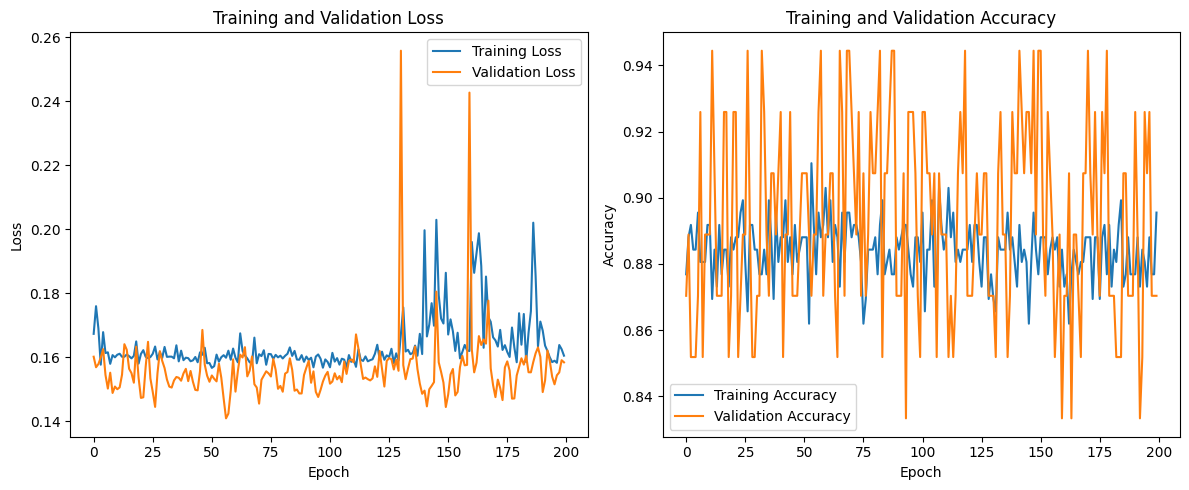

In [ ]:
import matplotlib.pyplot as plt

# Plotting training history
plt.figure(figsize=(12, 5))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#from sklearn.model_selection import train_test_split


In [ ]:
'''
# Assuming your sequences have the shape (268, 219)
X = X.reshape((X.shape[0], 268, 219))

# Similarly, reshape your validation data if needed
X_val = X_val.reshape((X_val.shape[0], 268, 219))

# Now, you can fit the model
history = model.fit(X, Y, epochs=200, batch_size=32, validation_data=(X_val, Y_val))


ValueError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a simple Sequential model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(268, 219)))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have training data X_train and corresponding labels y_train
# Replace X_train and y_train with your actual training data
# Ensure your labels are one-hot encoded if you're using categorical crossentropy

# Train the model
model.fit(X_train, y_train, epochs=10)

# Now you can save the model to Google Drive
# The code for saving the model is the same as provided in the previous response


NameError: ignored

In [ ]:
#old
# Create the model
MLP = Sequential()
MLP.add(InputLayer(input_shape=(M,)))  # input layer
MLP.add(Dense(25 * M, activation='relu'))  # hidden layer 1
MLP.add(Dropout(0.3))
MLP.add(Dense(10 * M, activation='relu'))  # hidden layer 2
MLP.add(Dense(3 * M, activation='relu'))  # hidden layer 3
MLP.add(Dense(C, activation='softmax'))  # output layer

# Display the model summary
MLP.summary()

# Compile and train the model
MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MLP.fit(X, Y, epochs=200)
######################################################

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1100)              49500     
                                                                 
 dropout_1 (Dropout)         (None, 1100)              0         
                                                                 
 dense_5 (Dense)             (None, 440)               484440    
                                                                 
 dense_6 (Dense)             (None, 132)               58212     
                                                                 
 dense_7 (Dense)             (None, 6)                 798       
                                                                 
Total params: 592950 (2.26 MB)
Trainable params: 592950 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ValueError: ignored

To save the model to your Google Drive, you can use the following code:

In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the full path to save the model files
json_file_path = '/content/drive/MyDrive/MyModels/model_MLP.json'
h5_file_path = '/content/drive/MyDrive/MyModels/model_MLP.h5'

# Assuming you have a model named 'model' that you want to save
# Replace 'model' with the actual name of your model

# Convert the model to JSON format and save the architecture to a file
model_json = model.to_json()
with open(json_file_path, 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights(h5_file_path)

print("Model saved to Google Drive:")
print(f"JSON file path: {json_file_path}")
print(f"H5 file path: {h5_file_path}")


Mounted at /content/drive


NameError: ignored

In [ ]:
# A 5
model_json = MLP.to_json()
with open("model_MLP.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
MLP.save_weights("model_MLP.h5")
print("Saved model to disk")

print (Aeng.c_dict)

# A 6
print (trainset[0:4])
w = "here"
X1 = Aeng.convert_TS_to_X([(w,'x')],2)
print (X1)
Y = (list) (MLP.predict(X1)[0])
print (Y)
my = Y.index(max(Y))
cat = ''
for k in Aeng.c_dict.keys():
    if Aeng.c_dict[k] == my:
        cat = k

print ("category for '",w, "' is ", cat)

#A 7
from tensorflow.keras.models import model_from_json

json_file = open('model_MLP.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_MLP = model_from_json(loaded_model_json)
# load weights into new model
loaded_MLP.load_weights("model_MLP.h5")
print("Loaded model from disk")

Y = (list) (loaded_MLP.predict(X1)[0])
print (Y)
my = Y.index(max(Y))
cat = ''
for k in Aeng.c_dict.keys():
    if Aeng.c_dict[k] == my:
        cat = k

print ("category for '",w, "' is ", cat)


**Section A 5:**

In [ ]:
#New
# Save the model architecture to a JSON file
model_json = MLP.to_json()
with open("model_MLP.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
MLP.save_weights("model_MLP.h5")
print("Saved model to disk")


The code saves the architecture of a neural network model (MLP) to a JSON file (model_MLP.json).

It also saves the weights of the model to an HDF5 file (model_MLP.h5).

This is a common practice to persistently store a trained model so that it can be loaded later for making predictions without retraining.

**Section A 6:**

In [ ]:
# New
# Print the category dictionary
print(Aeng.c_dict)

# Print a portion of the training set
print(trainset[0:4])

# Convert the word "here" to input format and make a prediction
w = "here"
X1 = Aeng.convert_TS_to_X([(w, 'x')], 2)
print(X1)

# Make predictions using the trained model (MLP)
Y = list(MLP.predict(X1)[0])
print(Y)

# Find the category with the highest predicted probability
my = Y.index(max(Y))
cat = ''
for k in Aeng.c_dict.keys():
    if Aeng.c_dict[k] == my:
        cat = k

print("category for '", w, "' is ", cat)


It prints the category dictionary (Aeng.c_dict), which likely maps category labels to numerical indices.

It prints a portion of the training set (trainset).

It converts the word "here" to the input format expected by the model (X1) using the convert_TS_to_X method of the Aeng object.

It uses the trained MLP model to make predictions (MLP.predict(X1)) and prints the predicted probabilities for each category.

It determines the category with the highest predicted probability and prints the result.

**Section A 7:**

In [ ]:
# Load the model architecture from the JSON file
from tensorflow.keras.models import model_from_json

json_file = open('model_MLP.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_MLP = model_from_json(loaded_model_json)

# Load the weights into the new model
loaded_MLP.load_weights("model_MLP.h5")
print("Loaded model from disk")

# Make predictions using the loaded model
Y = list(loaded_MLP.predict(X1)[0])
print(Y)

# Find the category with the highest predicted probability
my = Y.index(max(Y))
cat = ''
for k in Aeng.c_dict.keys():
    if Aeng.c_dict[k] == my:
        cat = k

print("category for '", w, "' is ", cat)


It loads the model architecture from the JSON file and the weights from the HDF5 file.

It makes predictions using the loaded model for the input X1 and prints the predicted probabilities.

It finds the category with the highest predicted probability and prints the result.

In [ ]:
import nltk
nltk.download('wordnet_ic')

[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!


True

In [ ]:
Bsg = build_sem_graph('L',Edict,Verb_prep)

In [ ]:
# building a semantic graph from the dependency tree

code_output=Bsg.build_sg("Abebe reads a book deeply in the library each day after lunch")


In [ ]:
for key in code_output.keys():
  print(code_output[key])
  #print(key)

In [ ]:
import re
for key in code_output.keys():
  #print(key," : ",code_output[key])
  #print(key)
  if(key=="Predicate"):
    # Initialize an empty string to store the concatenated result
    Pr = ""

    # Iterate through the tuple elements and concatenate them
    for element in code_output[key]:
        Pr += "".join(element)

    # Remove special characters using regular expression
    Pr = re.sub(r'[^a-zA-Z0-9\s]', '', Pr)
    print(Pr)
  elif key == "Subject":
    # Initialize an empty string to store the concatenated result
    S = ""

    # Iterate through the tuple elements and concatenate them
    for element in code_output[key]:
        S += "".join(element)

    # Remove special characters using regular expression
    S = re.sub(r'[^a-zA-Z0-9\s]', '', S)
    print(S)
  elif(key=="Direct Object"):
    # Initialize an empty string to store the concatenated result
    DO = ""

    # Iterate through the tuple elements and concatenate them
    for element in code_output[key]:
        DO += "".join(element)

    # Remove special characters using regular expression
    DO = re.sub(r'[^a-zA-Z0-9\s]', '', DO)

  elif(key=="Indirect Object"):
    # Initialize an empty string to store the concatenated result
    IO = ""

    # Iterate through the tuple elements and concatenate them
    for element in code_output[key]:
        IO += "".join(element)

    # Remove special characters using regular expression
    IO = re.sub(r'[^a-zA-Z0-9\s]', '', IO)
    print(IO)
  elif(key=="Time"):
  # Initialize an empty string to store the concatenated result
    T = ""
    # Iterate through the tuple elements and concatenate them
    for element in code_output[key]:
        T += "".join(element)
    # Remove special characters using regular expression
    T = re.sub(r'[^a-zA-Z0-9\s]', '', T)
    print("Time: ",T)
  elif(key=="Place"):
  # Initialize an empty string to store the concatenated result
    P = ""
    # Iterate through the tuple elements and concatenate them
    for element in code_output[key]:
        P += "".join(element)
    # Remove special characters using regular expression
    P = re.sub(r'[^a-zA-Z0-9\s]', '', P)
  elif(key=="Manner"):
  # Initialize an empty string to store the concatenated result
    M = ""
    # Iterate through the tuple elements and concatenate them
    for element in code_output[key]:
        M += "".join(element)
    # Remove special characters using regular expression
    M = re.sub(r'[^a-zA-Z0-9\s]', '', M)
  elif(key=="Frequency"):
  # Initialize an empty string to store the concatenated result
    F = ""
    # Iterate through the tuple elements and concatenate them
    for element in code_output[key]:
        F += "".join(element)
    # Remove special characters using regular expression
    F = re.sub(r'[^a-zA-Z0-9\s]', '', F)
  else:
    E=""


read
Abebe

Time:  deeplyday eachafter lunch lunch


# **Semantic Graph Using Networkx**

In [ ]:
!pip install networkx matplotlib

In [ ]:
print(Pr,S,DO,IO,T,P,M,F)

read Abebe book a  deeplyday eachafter lunch lunch in library library the  


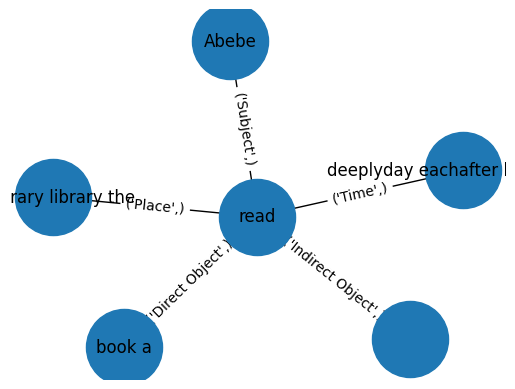

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define nodes as tuples
LabelPr = (Pr)
LabelS = ("Subject",)
LabelDO = ("Direct Object",)
LabelIO = ("Indirect Object",)
LabelT = ("Time",)
LabelP = ("Place",)
#LabelM = ("Manner",)
#LabelF = ("Frequency",)

# Add nodes to the graph
G.add_node(Pr)
G.add_node(S)
G.add_node(DO)
G.add_node(IO)
G.add_node(T)
G.add_node(P)
#G.add_node(M)
#G.add_node(F)

# Add edges using tuples
G.add_edge(LabelPr, Pr, label=LabelPr)
G.add_edge(LabelPr, S, label=LabelS)
G.add_edge(LabelPr, DO, label=LabelDO)
G.add_edge(LabelPr, IO, label=LabelIO)
G.add_edge(LabelPr, T, label=LabelT)
G.add_edge(LabelPr, P, label=LabelP)
#G.add_edge(LabelPr, M, label=LabelM)
#G.add_edge(LabelPr, F, label=LabelF)

# Draw the graph
pos = nx.spring_layout(G)  # Positions of nodes
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_nodes(G, pos, node_size=3000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis("off")
plt.show()


# **(AQG) system using a semantic graph**

This is the steps to create an automatic question generation (AQG) system using a semantic graph with nodes representing Predicate, Subject, Direct Object, Indirect Object, Time, Place, Manner, and Frequency, you can follow these steps using Google Colab:

# **Install Required Libraries:**
Make sure you have the necessary libraries installed. You may need to install some additional packages like networkx for working with graphs. Run the following commands in a Colab cell:

In [ ]:
!pip install networkx

# **2. Import Libraries:**
Import the required libraries in your Colab notebook.

In [ ]:
import networkx as nx

# **3. Create a Semantic Graph:**
Define your semantic graph using NetworkX. Add nodes and edges to represent the relationships between Predicate, Subject, Direct Object, Indirect Object, Time, Place, Manner, and Frequency.

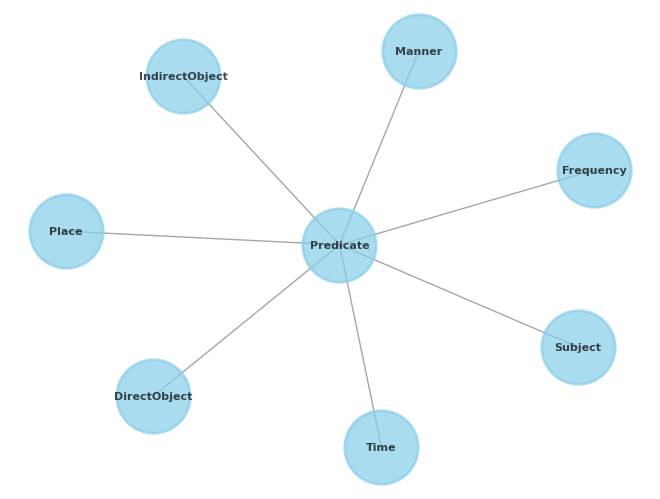

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
nodes = ["Predicate", "Subject", "DirectObject", "IndirectObject", "Time", "Place", "Manner", "Frequency"]
G.add_nodes_from(nodes)

# Add edges to represent relationships
edges = [("Predicate", "Subject"), ("Predicate", "DirectObject"), ("Predicate", "IndirectObject"),
         ("Predicate", "Time"), ("Predicate", "Place"), ("Predicate", "Manner"), ("Predicate", "Frequency")]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # You can choose a different layout if needed
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2800, node_color='skyblue', font_color='black', font_size=8, edge_color='gray', linewidths=2, alpha=0.7)

# Show the plot
plt.show()


# **4. Generate Question Templates:**
Now, you can generate question templates based on the semantic graph. Create functions to generate questions based on the relationships between different nodes.

In [ ]:
'''
import networkx as nx

def generate_question(node_values, question_word='What'):
    if question_word == 'What':
        question_template = f"{question_word} {node_values['Predicate']} {node_values['Subject']}?"
    elif question_word == 'How':
        question_template = f"{question_word} {node_values['Predicate']} {node_values['Manner']}?"
    elif question_word == 'Where':
        question_template = f"{question_word} {node_values['Place']} {node_values['Predicate']}?"
    elif question_word == 'When':
        question_template = f"{question_word} {node_values['Time']} {node_values['Predicate']}?"
    elif question_word == 'Who':
        question_template = f"{question_word} {node_values['Subject']} {node_values['Predicate']}?"
    elif question_word == 'Why':
        question_template = f"{question_word} {node_values['Predicate']}?"
    elif question_word == 'How often':
        question_template = f"{question_word} does {node_values['Subject']} {node_values['Predicate']}?"

    return question_template

# Example usage
node_values_example = {
    'Predicate': 'eat',
    'Subject': 'you',
    'DirectObject': 'an apple',
    'IndirectObject': 'John',
    'Time': 'noon',
    'Place': 'the kitchen',
    'Manner': 'quickly',
    'Frequency': 'daily'
}

question_words = ['What', 'How', 'Where', 'When', 'Who', 'Why', 'How often']

for question_word in question_words:
    question = generate_question(node_values_example, question_word)
    print(question)


In [ ]:
import networkx as nx

def generate_question(node_values):
    if 'Place' in node_values:
        question_template = f"Where {node_values['Place']} {node_values['Predicate']}?"
    elif 'Time' in node_values:
        question_template = f"When {node_values['Time']} {node_values['Predicate']}?"
    elif 'Subject' in node_values:
        question_template = f"Who {node_values['Subject']} {node_values['Predicate']}?"
    elif 'Manner' in node_values:
        question_template = f"How {node_values['Manner']} {node_values['Predicate']}?"
    elif 'Frequency' in node_values:
        question_template = f"How often does {node_values['Subject']} {node_values['Predicate']}?"
    else:
        question_template = f"What {node_values['Predicate']} {node_values['Subject']}?"

    return question_template

# Example usage
node_values_example = {
    'Predicate': 'eat',
    'Subject': 'you',
    'DirectObject': 'an apple',
    'IndirectObject': 'John',
    'Time': 'noon',
    'Place': 'the kitchen',
    'Manner': 'quickly',
    'Frequency': 'daily'
}

question = generate_question(node_values_example)
print(question)

# **5. Iterate and Test:**
Iterate over different combinations of node values to test and generate a variety of question templates.

In [ ]:
for predicate_value in ["eat", "read", "watch"]:
    for subject_value in ["you", "she", "they"]:
        # Iterate over other nodes as well
        # ...

        question = generate_question(predicate_value, subject_value, direct_object_value, indirect_object_value, time_value, place_value, manner_value, frequency_value)
        print(question)


# **1. To create a web-based prototype**

In [ ]:
!pip install flask

In [ ]:
from flask import Flask, render_template, request
import your_question_generation_module  # Replace with the actual module containing your question generation logic

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/generate_question', methods=['POST'])
def generate_question():
    node_values = {key: request.form[key] for key in request.form}
    question = your_question_generation_module.generate_question(node_values)
    return render_template('index.html', question=question)

if __name__ == '__main__':
    app.run(debug=True)


Next, create a folder named templates in the same directory as your Flask application, and within that folder, create a file named index.html with the following content:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Question Generator</title>
</head>
<body>
    <h1>Question Generator</h1>
    <form action="{{ url_for('generate_question') }}" method="post">
        <!-- Add input fields for each node in your semantic graph -->
        <label for="Predicate">Predicate:</label>
        <input type="text" name="Predicate" required><br>

        <label for="Subject">Subject:</label>
        <input type="text" name="Subject" required><br>

        <!-- Add input fields for other nodes as needed -->

        <button type="submit">Generate Question</button>
    </form>

    {% if question %}
        <h2>Generated Question:</h2>
        <p>{{ question }}</p>
    {% endif %}
</body>
</html>


# **2. Test two**

users to input a simple sentence, generate the semantic graph from that sentence, and then provide question-and-answer pairs based on the semantic graph, you may need to incorporate natural language processing (NLP) techniques. In this example, I'll use the spaCy library for natural language processing.

First, you'll need to install spaCy:

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
from flask import Flask, render_template, request
import spacy
from spacy import displacy

app = Flask(__name__)

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/generate_question', methods=['POST'])
def generate_question():
    # Get input sentence from the user
    sentence = request.form['sentence']

    # Process the input sentence using spaCy
    doc = nlp(sentence)

    # Generate the semantic graph (you may need to customize this part based on your specific needs)
    semantic_graph = {}  # Implement your logic to create the semantic graph from spaCy's document

    # Generate question-and-answer pairs
    question_answer_pairs = []  # Implement your logic to generate Q&A pairs from the semantic graph

    # Visualize the semantic graph using spaCy's displacy
    graph_html = displacy.render(doc, style='dep', options={'distance': 90}, page=True)

    return render_template('index.html', graph_html=graph_html, question_answer_pairs=question_answer_pairs)

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Question Generator</title>
</head>
<body>
    <h1>Question Generator</h1>
    <form action="{{ url_for('generate_question') }}" method="post">
        <label for="sentence">Enter a sentence:</label>
        <input type="text" name="sentence" required><br>

        <button type="submit">Generate Question</button>
    </form>

    {% if graph_html %}
        <h2>Semantic Graph:</h2>
        {{ graph_html|safe }}
    {% endif %}

    {% if question_answer_pairs %}
        <h2>Question and Answer Pairs:</h2>
        <ul>
            {% for question, answer in question_answer_pairs %}
                <li>{{ question }} - {{ answer }}</li>
            {% endfor %}
        </ul>
    {% endif %}
</body>
</html>


# **A complete Flask web application** that takes a sentence as input, extracts relevant information (Predicate, Subject, Direct Object, Indirect Object, Time, Place, Manner, Frequency) using spaCy, generates a semantic graph, and displays both the semantic graph and question-answer pairs.

In [ ]:
!pip install flask

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
from flask import Flask, render_template, request
import spacy
from spacy import displacy

app = Flask(__name__)

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def generate_semantic_graph(doc):
    # Implement your logic to create the semantic graph from spaCy's document
    semantic_graph = {}
    # Example: Extracting entities and relations
    for token in doc:
        if token.dep_ in ('nsubj', 'dobj', 'iobj', 'prep', 'pobj'):
            semantic_graph[token.dep_] = token.text
    return semantic_graph

def generate_question_answer_pairs(semantic_graph):
    question_answer_pairs = []

    # Generate "Who" question
    if 'nsubj' in semantic_graph and 'dobj' in semantic_graph:
        question_answer_pairs.append(("Who", semantic_graph['nsubj'], "does what?", semantic_graph['dobj']))

    # Generate "What" question
    if 'nsubj' in semantic_graph and 'dobj' in semantic_graph:
        question_answer_pairs.append(("What", semantic_graph['nsubj'], "does?", semantic_graph['dobj']))

    # Generate "Where" question
    if 'nsubj' in semantic_graph and 'prep' in semantic_graph and 'pobj' in semantic_graph:
        question_answer_pairs.append(("Where", semantic_graph['nsubj'], "does what?", semantic_graph['pobj']))

    # Generate "When" question
    if 'nsubj' in semantic_graph and 'prep' in semantic_graph and 'pobj' in semantic_graph:
        question_answer_pairs.append(("When", semantic_graph['nsubj'], "does what?", semantic_graph['pobj']))

    # Generate "How" question
    if 'advmod' in semantic_graph and 'nsubj' in semantic_graph and 'root' in semantic_graph:
        question_answer_pairs.append(("How", semantic_graph['nsubj'], semantic_graph['advmod'], semantic_graph['root']))

    # Generate "How often" question
    if 'nsubj' in semantic_graph and 'root' in semantic_graph and 'nsubj' in semantic_graph['root'] and 'advmod' in semantic_graph['root']['nsubj']:
        question_answer_pairs.append(("How often", semantic_graph['nsubj'], semantic_graph['root']['nsubj']['advmod'], semantic_graph['root']))

    # Generate "Why" question
    if 'advmod' in semantic_graph and 'root' in semantic_graph:
        question_answer_pairs.append(("Why", semantic_graph['advmod'], semantic_graph['root']))

    # Add more rules for other question types as needed...

    return question_answer_pairs

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/generate_question', methods=['POST'])
def generate_question():
    # Get input sentence from the user
    sentence = request.form['sentence']

    # Process the input sentence using spaCy
    doc = nlp(sentence)

    # Generate the semantic graph
    semantic_graph = generate_semantic_graph(doc)

    # Generate question-and-answer pairs
    question_answer_pairs = generate_question_answer_pairs(semantic_graph)

    # Visualize the semantic graph using spaCy's displacy
    graph_html = displacy.render(doc, style='dep', options={'distance': 90}, page=True)

    return render_template('index.html', graph_html=graph_html, question_answer_pairs=question_answer_pairs)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Create a folder named templates in the same directory as your Flask application, and within that folder, create a file named index.html with the following content:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Semantic Graph Generator</title>
</head>
<body>
    <h1>Semantic Graph Generator</h1>
    <form action="{{ url_for('generate_question') }}" method="post">
        <label for="sentence">Enter a sentence:</label>
        <input type="text" name="sentence" required><br>

        <button type="submit">Generate Semantic Graph</button>
    </form>

    {% if graph_html %}
        <h2>Semantic Graph:</h2>
        {{ graph_html|safe }}
    {% endif %}

    {% if question_answer_pairs %}
        <h2>Question and Answer Pairs:</h2>
        <ul>
            {% for question, answer1, separator, answer2 in question_answer_pairs %}
                <li>{{ question }} {{ answer1 }} {{ separator }} {{ answer2 }}</li>
            {% endfor %}
        </ul>
    {% endif %}
</body>
</html>


# **Test Using Flask-ngrok**

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Add Flask-ngrok to your app

@app.route('/')
def index():
    return 'Hello, world!'

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://5cc7-35-245-119-92.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [08/Dec/2023 11:05:02] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Dec/2023 11:05:04] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
!pin install pyngrok

/bin/bash: line 1: pin: command not found


In [ ]:
!ngrok config add-authtoken 2ZFrgygKZ87LsG0knWpz04H3BUG_6sooxuu1CucUk8GVXk9im

# **Run streamlit app from a Google Colab Notebook**

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


**Create a streamlit app example**

In [ ]:
%%writefile app.py
import streamlit as st

x = st.slider('Select a value')
st.write(x, 'squared is', x * x)

Writing app.py


**Install localtunnel**

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.965s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


Run streamlit in background

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

**Expose the port 8501**

Then just click in the url showed.

A log.txtfile will be created.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.55s
your url is: https://fuzzy-showers-eat.loca.lt
^C


# **Test Two Streamlit**

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)
def main():
	st.title("Awesome Streamlit for ML")
	st.subheader("How to run streamlit from colab")
	menu = ["Home","About"]
	choice = st.sidebar.selectbox('Menu',menu)
	if choice == 'Home':
		st.subheader("Streamlit From Colab")
if __name__ == '__main__':
	main()

Overwriting app.py


In [ ]:
!ls

app.py	logs.txt  node_modules	package-lock.json  sample_data


In [ ]:
!ngrok

NAME:
  ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

DESCRIPTION: 
  ngrok exposes local networked services behinds NATs and firewalls to the
  public internet over a secure tunnel. Share local websites, build/test
  webhook consumers and self-host personal services.
  Detailed help for each command is available with 'ngrok help <command>'.
  Open http://localhost:4040 for ngrok's web interface to inspect traffic.

Author:
  ngrok - <support@ngrok.com>

TERMS OF SERVICE: https://ngrok.com/tos

EXAMPLES: 
  ngrok http 80                           # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080  # port 8080 available at baz.ngrok.dev
  ngrok http foo.dev:80                   # tunnel to host:port instead of localhost
  ngrok http https://localhost            # expose a local https server
  ngrok tcp 22                            # tunnel arbitrary TCP traffic to port 22
  ngrok tls --domain=foo.com 44

In [ ]:
from pyngrok import ngrok

In [ ]:
#!nohub streamlit run app.py
!streamlit run app.py &>/dev/null&

In [ ]:
!pgrep streamlit

85481
89685


In [ ]:
from pyngrok import ngrok
!streamlit run app.py&>/dev/null&
!pgrep streamlit

85481
89685
92244


In [ ]:
!ngrok start

NAME:
  start - start tunnels by name from the configuration file

USAGE:
  ngrok start [flags]

DESCRIPTION: 
  Starts tunnels by name from the configuration file. You may specify any
  number of tunnel names. You may start all tunnels in the configuration
  file with the --all switch.

TERMS OF SERVICE: https://ngrok.com/tos

EXAMPLES: 
  ngrok start dev        # start tunnel named 'dev' in the configuration file
  ngrok start web blog   # start tunnels named 'web' and 'blog'
  ngrok start --all      # start all tunnels defined in the config file

OPTIONS:
      --all                 start all tunnels in the configuration file
      --authtoken string    ngrok.com authtoken identifying a user
      --config strings      path to config files; they are merged if multiple
  -h, --help                help for start
      --log string          path to log file, 'stdout', 'stderr' or 'false' (default "false")
      --log-format string   log record format: 'term', 'logfmt', 'json' (default 

In [ ]:
tunnels:
  - name: my-tunnel
    proto: http
    addr: localhost
    port: 8080

In [ ]:
from pyngrok import ngrok

# Set the configuration
config = {
    "tunnels": [
        {"name": "my_tunnel", "proto": "http", "addr": 5000}
    ]
}

# Open tunnels using the configuration
!ngrok.set_config(config)
public_url = ngrok.connect()

print(f" * ngrok tunnel {public_url} -> http://127.0.0.1:5000")


/bin/bash: -c: line 1: syntax error near unexpected token `config'
/bin/bash: -c: line 1: `ngrok.set_config(config)'
 * ngrok tunnel NgrokTunnel: "https://0d10-35-245-119-92.ngrok.io" -> "http://localhost:80" -> http://127.0.0.1:5000


In [ ]:
from pyngrok import ngrok

# Connect to the web service running on localhost:80
public_url = ngrok.connect(addr="localhost:80")
print(f" * ngrok tunnel {public_url} -> http://127.0.0.1:80")


 * ngrok tunnel NgrokTunnel: "https://c060-35-245-119-92.ngrok.io" -> "http://localhost:80" -> http://127.0.0.1:80


In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

In [ ]:
!pip install pyngrok --upgrade

In [ ]:
from pyngrok import ngrok

# Set the configuration
config = {
    "port": 5000,  # Specify the port you want to expose
    "region": "us"  # Specify the ngrok region
}

# Open a ngrok tunnel to the Flask app
public_url = ngrok.connect(**config)
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}/\"".format(public_url, config["port"]))

# Keep the program running
input("Press Enter to exit...")


PyngrokNgrokHTTPError: ignored

# **Create RDF Graph**

Creating an RDF or OWL ontology involves representing knowledge in a formal way using triples or classes and properties. In this case, we'll use RDF to represent the extracted information (Predicate, Subject, Direct Object, Indirect Object, Time, Place, Manner, Frequency) from a sentence.

Here's a basic code using RDFlib in Python:

In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
from rdflib import Graph, URIRef, Literal, Namespace

# Define RDF namespaces
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
ex = Namespace("http://example.org/")

# Function to create RDF triples
def create_rdf(subject, predicate, obj, graph):
    graph.add((subject, predicate, obj))

# Function to extract information from a sentence and create RDF triples
def extract_information(sentence):
    # Assuming you have a function or method to extract relevant information from the sentence
    # For simplicity, let's create a dummy extraction
    predicate = "gave"
    subject = "John"
    direct_object = "book"
    indirect_object = "Mary"
    time = "yesterday"
    place = "park"
    manner = "generously"
    frequency = "once"

    # Create RDF graph
    g = Graph()

    # Define subjects and objects as URIs
    subj_uri = ex[subject]
    pred_uri = ex[predicate]
    dobj_uri = ex[direct_object]
    iobj_uri = ex[indirect_object]
    time_uri = ex[time]
    place_uri = ex[place]
    manner_uri = ex[manner]
    freq_uri = ex[frequency]

    # Create RDF triples
    #create_rdf(subj_uri, rdf.type, ex["Person"], g)
    create_rdf(subj_uri, ex.hasPredicate, pred_uri, g)
    create_rdf(subj_uri, ex.hasDirectObject, dobj_uri, g)
    create_rdf(subj_uri, ex.hasIndirectObject, iobj_uri, g)
    create_rdf(subj_uri, ex.hasTime, time_uri, g)
    create_rdf(subj_uri, ex.hasPlace, place_uri, g)
    create_rdf(subj_uri, ex.hasManner, manner_uri, g)
    create_rdf(subj_uri, ex.hasFrequency, freq_uri, g)

    return g

# Example usage
#sentence = "John gave a book to Mary at the park yesterday."
sentence = "Lalibela is an ancient rock-hewn-church found in Ethiopia."
rdf_graph = extract_information(sentence)

# Serialize and print RDF graph
print(rdf_graph.serialize(format="turtle"))


@prefix ns1: <http://example.org/> .

ns1:John ns1:hasDirectObject ns1:book ;
    ns1:hasFrequency ns1:once ;
    ns1:hasIndirectObject ns1:Mary ;
    ns1:hasManner ns1:generously ;
    ns1:hasPlace ns1:park ;
    ns1:hasPredicate ns1:gave ;
    ns1:hasTime ns1:yesterday .




We have created a representation of knowledge using RDF (Resource Description Framework) triples. RDF is commonly used for building semantic graphs. In our case, we have defined entities (subjects and objects) and relationships (predicates) between them.

This representation can be considered a simple ontology because it captures the structure and relationships of entities in a specific domain. It includes classes (ns1:Person), properties (ns1:hasDirectObject, ns1:hasFrequency, etc.), and instances of those classes (e.g., ns1:John). These elements collectively form a basic semantic graph describing relationships and attributes associated with the entities mentioned in your sentence.

It's worth noting that the complexity of ontologies can vary significantly based on the domain and requirements. More sophisticated ontologies might involve the use of OWL (Web Ontology Language) and include additional constructs for expressing more complex relationships and constraints. Nonetheless, what we have created is a simple semantic representation using RDF, which can serve as a foundation for building more elaborate ontologies if needed.


Creating an ontology using OWL (Web Ontology Language) involves defining classes, individuals, properties, and axioms. Here's a basic example using the OWL/XML format to represent the ontology for the information extracted from your sentence:

In [ ]:
from rdflib import Graph, Namespace, RDF, OWL, Literal

# Define RDF namespaces
ns1 = Namespace("http://example.org/")

# Create RDF graph
g = Graph()

# Add triples to the graph
g.add((ns1.John, RDF.type, ns1.Person))
g.add((ns1.Person, RDF.type, OWL.Class))
g.add((ns1.John, ns1.hasPredicate, ns1.gave))
g.add((ns1.John, ns1.hasDirectObject, ns1.book))
g.add((ns1.John, ns1.hasIndirectObject, ns1.Mary))
g.add((ns1.John, ns1.hasTime, ns1.yesterday))
g.add((ns1.John, ns1.hasPlace, ns1.park))
g.add((ns1.John, ns1.hasManner, ns1.generously))
g.add((ns1.John, ns1.hasFrequency, Literal("once")))

# Serialize and print RDF graph in RDF/XML format
print(g.serialize(format="xml"))



<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ns1="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/Person">
    <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#Class"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/John">
    <rdf:type rdf:resource="http://example.org/Person"/>
    <ns1:hasPredicate rdf:resource="http://example.org/gave"/>
    <ns1:hasDirectObject rdf:resource="http://example.org/book"/>
    <ns1:hasIndirectObject rdf:resource="http://example.org/Mary"/>
    <ns1:hasTime rdf:resource="http://example.org/yesterday"/>
    <ns1:hasPlace rdf:resource="http://example.org/park"/>
    <ns1:hasManner rdf:resource="http://example.org/generously"/>
    <ns1:hasFrequency>once</ns1:hasFrequency>
  </rdf:Description>
</rdf:RDF>



In [ ]:
with open("ontology.rdf", "w") as f:
    f.write(g.serialize(format="xml"))

o visualize RDF graphs or OWL ontologies, you can use external tools since direct visualization within Colab is limited. One popular tool for visualizing RDF data is "RDFLib." It's an online tool where you can paste your RDF/XML data and visualize it.

Here's how you can use RDFLib:

Copy the RDF/XML output from your Python code.
Visit the RDFLib website: http://www.ldf.fi/service/rdf-grapher.
Paste your RDF/XML data into the text area.
Click on the "Graph!" button.
RDFLib will generate a visual representation of your RDF graph. You can explore nodes and edges, making it easier to understand the structure of your ontology.

If you need more advanced visualization or analysis, you might consider using tools like Protege or Graffoo, which are specifically designed for working with ontologies. You can download Protege and load your ontology file to explore and visualize it locally.

Remember to save your RDF/XML data to a file if you're using a local tool. You can save it using the following code:

In [ ]:
!pin install inflect

/bin/bash: line 1: pin: command not found


In [ ]:
import inflect

# Create an inflect engine instance
p = inflect.engine()

# Function to convert number to words
def number_to_words(number):
    # Convert the number to words
    words = p.number_to_words(number)
    return words

# Example usage
number = 125
words = number_to_words(number)
print(f'The number {number} in words is: {words}')

The number 125 in words is: one hundred and twenty-five


In [ ]:
# Number to Words

# Main Logic
ones = ('ዜሮ', 'አንድ', 'ሁለት', 'ሶስት', 'አራት', 'አምስት', 'ስድስት', 'ሰባት', 'ስምንት', 'ዘጠኝ')

twos = ('አሥር', 'አስራ አንድ', 'አስራ ሁለት', 'አስራ ሶስት', 'አስራ አራት', 'አስራ አምስት', 'አስራ ስድስት', 'አስራ ሰባት', 'አስራ ስምንት', 'አስራ ዘጠኝ')

tens = ('ሀያ', 'ሰላሳ', 'አርባ', 'ሀምሳ', 'ስልሳ', 'ሰባ', 'ሰማንያ', 'ዘጠና', 'መቶ')

suffixes = ('', 'ሺህ', 'ሚሊዮን', 'ቢሊዮን')

def process(number, index):

    if number=='0':
        return 'ዜሮ'

    length = len(number)

    if(length > 3):
        return False

    number = number.zfill(3)
    words = ''

    hdigit = int(number[0])
    tdigit = int(number[1])
    odigit = int(number[2])

    words += '' if number[0] == '0' else ones[hdigit]
    words += ' መቶ ' if not words == '' else ''

    if(tdigit > 1):
        words += tens[tdigit - 2]
        words += ' '
        words += ones[odigit]

    elif(tdigit == 1):
        words += twos[(int(tdigit + odigit) % 10) - 1]

    elif(tdigit == 0):
        words += ones[odigit]

    if(words.endswith('ዜሮ')):
        words = words[:-len('ዜሮ')]
    else:
        words += ' '

    if(not len(words) == 0):
        words += suffixes[index]

    return words;

def getWords(number):
    length = len(str(number))

    if length>12:
        return 'This program supports upto 12 digit numbers.'

    count = length // 3 if length % 3 == 0 else length // 3 + 1
    copy = count
    words = []

    for i in range(length - 1, -1, -3):
        words.append(process(str(number)[0 if i - 2 < 0 else i - 2 : i + 1], copy - count))
        count -= 1;

    final_words = ''
    for s in reversed(words):
        temp = s + ' '
        final_words += temp

    return final_words
# End Main Logic

# Reading number from user
number = int(input('Enter any number: '))
print('%d in words is: %s' %(number, getWords(number)))

Enter any number: 1000
1000 in words is: አንድ ሺህ  


In [ ]:
num2words = {1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', \
             6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine', 10: 'Ten', \
            11: 'Eleven', 12: 'Twelve', 13: 'Thirteen', 14: 'Fourteen', \
            15: 'Fifteen', 16: 'Sixteen', 17: 'Seventeen', 18: 'Eighteen', \
            19: 'Nineteen', 20: 'Twenty', 30: 'Thirty', 40: 'Forty', \
            50: 'Fifty', 60: 'Sixty', 70: 'Seventy', 80: 'Eighty', \
            90: 'Ninety', 0: 'Zero'}

>>> def n2w(n):
        try:
            print num2words[n]
        except KeyError:
            try:
                print num2words[n-n%10] + num2words[n%10].lower()
            except KeyError:
                print 'Number out of range'

>>> n2w(0)
Zero
>>> n2w(13)
Thirteen
>>> n2w(91)
Ninetyone
>>> n2w(21)
Twentyone
>>> n2w(33)
Thirtythree